
# 은행과 같은 금융기관의 리테일 금융소비자(개인 고객)에게 가계신용대출(Home Credit Loan)을 할 경우 고객이 대출금을 상환할지 Target 변수 분류 및 대출금액 예측 프로젝트

* HCD : 현재 금융활동에 대한 원본데이터
* Past : 과거 금융활동에 대한 원본데이터

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import missingno as msno
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.impute import KNNImputer
from scipy.interpolate import interp1d
# from impyute.imputation.cs import mice
  # [실행 오류]
#from autoimpute.imputations import MiceImputer
#from scipy.stats import chi2_contingency
# from impyute.imputation.cs import mice
  # [실행 오류]
# pip install autoimpute
# from autoimpute.imputations import MiceImputer

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
  # [불균형한 분포도를 가진 집합이므로 Stratified K-Fold 교차검증]
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import *
  # [사이킷런 특징선택 세부 클래스의 모든 함수 호출]
from scipy.stats import chi2_contingency

!pip install prince
import prince
  # Multiple Correspondence Analysis

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
HCD = pd.read_csv("/content/drive/MyDrive/application_train.csv", index_col = False)

In [ ]:
HCD = pd.DataFrame(HCD)
HCD.iloc[:, 0:30].info()
HCD.iloc[:, 30:60].info()
HCD.iloc[:, 60:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [ ]:
CodeBook = pd.read_csv("/content/drive/MyDrive/HomeCredit_columns_description.csv", index_col = False, encoding = "Latin-1")
'''
[전체 데이터프레임 조회 목적]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
Past.iloc[:, [6, 15, 23]]
'''

"\n[전체 데이터프레임 조회 목적]\n\npd.set_option('display.max_columns', None)\npd.set_option('display.max_row', None)\nPast.iloc[:, [6, 15, 23]]\n"

In [ ]:
pd.set_option('display.max_row', None)

In [ ]:
CodeBook

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
Past = pd.read_csv("/content/drive/MyDrive/previous_application.csv", index_col = False)
Past["NAME_CASH_LOAN_PURPOSE"].unique()
Past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

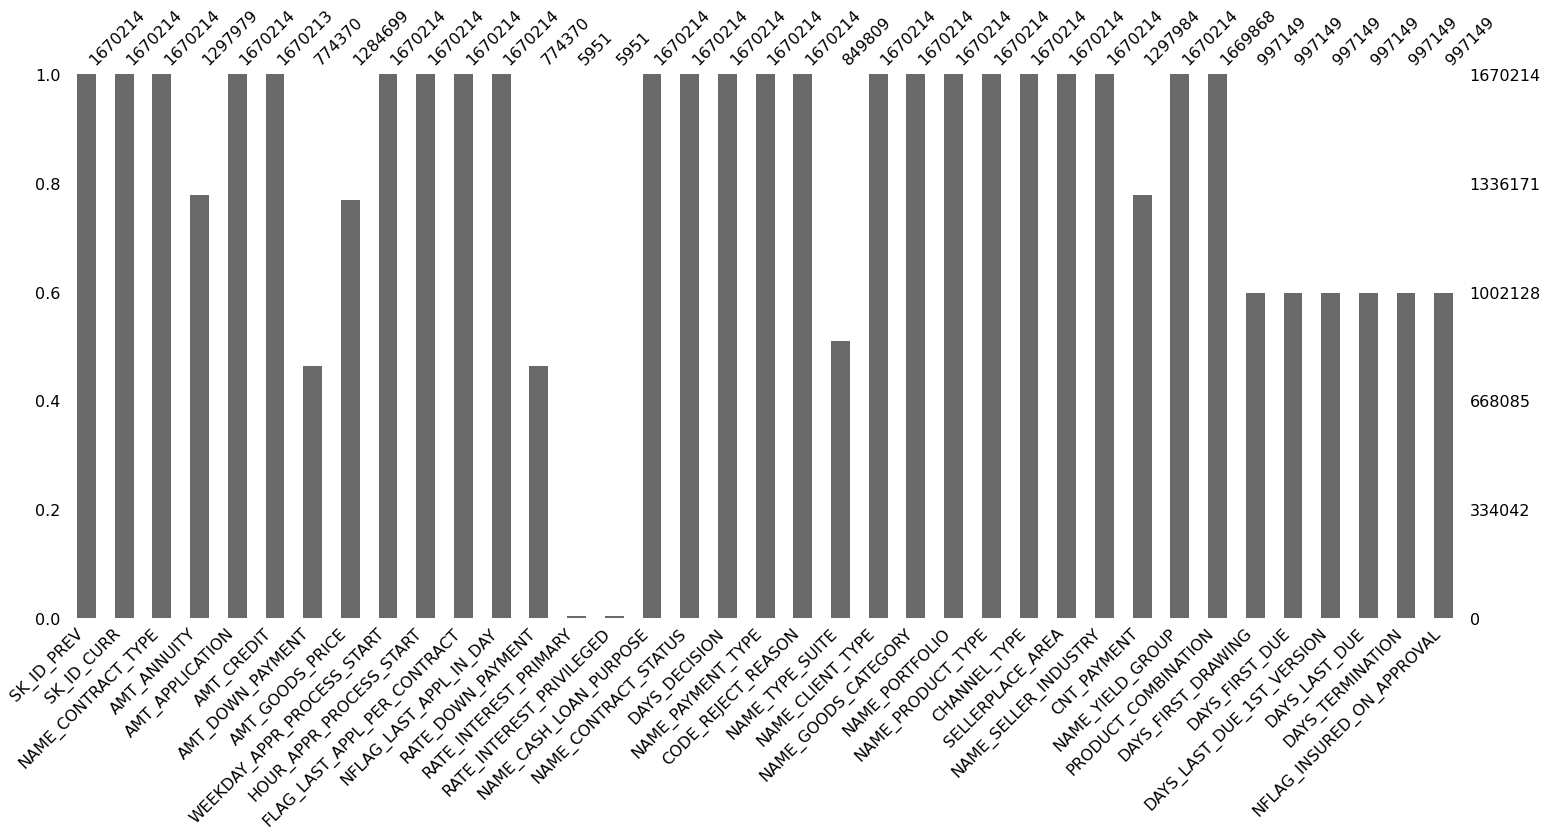

In [ ]:
msno.bar(Past)
Past.groupby(["NAME_CASH_LOAN_PURPOSE", "AMT_DOWN_PAYMENT"]).size()
    # [대출목적이 XAP가 아닌 신용대출의 계약금은 모두 0이므로 Down payment > 0인 행 모두 제거]
    # [관측치 삭제] 주택 매매 목적의 신용대출 데이터 제거 이유는 한국의 여신금융상품 체계는 주택담보대출과 신용대출을 구분하고 있기 때문
Past["AMT_DOWN_PAYMENT"].describe()
    # [Down payment on the previous application]

In [ ]:
index = Past[Past["AMT_DOWN_PAYMENT"] != 0].index
Past.drop(index, inplace = True)

In [ ]:
Past["AMT_DOWN_PAYMENT"].unique()
    # [대출목적이 XAP가 아닌 신용대출의 계약금은 모두 0이므로 Down payment > 0인 행 모두 제거]

array([0.])

In [ ]:
# HCD = HCD.truncate(before = "FLAG_DOCUMENT_21", after = "FLAG_DOCUMENT_2", axis = 1)
    # [ValueError: truncate requires a sorted index]
# HCD.drop(HCD.str.contains("FLAG_DOCUMENT").index, inplace = True)

# [Mutate]
# titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age >= 20 else "child", axis=1)

#### HCD 제거목록
    # DAYS_REGISTRATION : 19
    # DAYS_ID_PUBLISH
    # FLAG_MOBIL ~ FLAG_EMAIL
    # CMT_FAMILY_MEMBERS
    # REGION_RATING_CLINET
    # WEEKDAY_APPR_PROCESS_START
    # HOUR_APPR_PROCESS_START
    # REG_REGION_NOT_LIVE_REGION ~ LIVE_CITY_NOT_WORK_CITY
    # DAYS_LAST_PHONE_CHANGE
    # FLAG_DOCUMENT_2~21
    # AMT_REQ_CREDIT_BUREAU
    # EXT_SOURCE_1~3   # 제거
    # 건물정보(APARTMENTS_AVG ~ ),
    * HOUSETYPE_MODE 제외(block of flats : 빌라, terraced house : 단독주택, specific housing : 공공주택)

In [ ]:
HCD.drop(HCD.filter(like = "FLAG_DOCUMENT"), axis = 1, inplace = True)
HCD.drop(HCD.filter(like = "EXT_SOURCE"), axis = 1, inplace = True)
col_names = HCD.columns.values

In [ ]:
values = pd.DataFrame({
    "column" : col_names,
    "number" : range(0, 99)})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
values

,column,number
0,SK_ID_CURR,0
1,TARGET,1
2,NAME_CONTRACT_TYPE,2
3,CODE_GENDER,3
4,FLAG_OWN_CAR,4
5,FLAG_OWN_REALTY,5
6,CNT_CHILDREN,6
7,AMT_INCOME_TOTAL,7
8,AMT_CREDIT,8
9,AMT_ANNUITY,9


In [ ]:
HCD["OBS_30_CNT_SOCIAL_CIRCLE"].head()
HCD["REG_REGION_NOT_LIVE_REGION"].unique()
HCD["REGION_RATING_CLIENT_W_CITY"].unique()
HCD['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
HCD.columns.get_loc("DAYS_REGISTRATION")
    # ["DAYS_REGISTRATION" 변수 제거를 위한 열 번호 추출]

19

In [ ]:
HCD_list = []
for i in range(0, 19, 1):
  HCD_list.append(i)
for i in [21, 28, 31, 40, 84]:
  HCD_list.append(i)
for i in range(88, 92, 1):
  HCD_list.append(i)
print(HCD_list, end = " ")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 28, 31, 40, 84, 88, 89, 90, 91] 

In [ ]:
HCD = HCD.iloc[ : , HCD_list]
    # [index location]

In [ ]:
HCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
    # [PANDAS] get column number from colomn name
    # dataframe.columns.get_loc("<col_name>")

#### Past 제거 목록
    # AMT_DOWN_PAYMENT [, 6]
    # WEEKDAY ~ HOUR [, [8,9]]
    # FLAG_LAST_APPL ~ [, [10,11]]NFLAG_LAST_APPL_IN_DAT
    # RATE_DOWN_PAYMENT [, 12]
    # DAYS_DESCION [, 17]
    # NAME_TYPE_SUITE [, 20]
    # NAME_PORTFOLIO [, 23]
    # CHANNEL_TYPE [, 25]
    # NAME_PRODUCT_TYPE (알 수 없음) [, 24]
    # SELLERPLACE_AREA [, 26]
    # CNT_PAYMENT (단위알수없음) [, 28]
    # DAYS~ [, 31:35]
    * NAMED_YEILD_GROUP - 기준금리, 가상금리

In [ ]:
# [Error] KeyError: '[6 8 9 10 11 12 17 20 23 24 25 26 28 31 32 33 34 35] not found in axis'
# Past.drop(columns = [6, 8, 9, 10, 11, 12, 17, 20, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35])

col_names = 0
col_names = Past.iloc[:, [6, 8, 9, 10, 11, 12, 17, 20, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35]].columns.values
col_names

array(['AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'NAME_TYPE_SUITE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype=object)

In [ ]:
for i in col_names:
  Past.drop(i, axis = 1, inplace = True)
Past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369854 entries, 0 to 1670209
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 369854 non-null  int64  
 1   SK_ID_CURR                 369854 non-null  int64  
 2   NAME_CONTRACT_TYPE         369854 non-null  object 
 3   AMT_ANNUITY                336466 non-null  float64
 4   AMT_APPLICATION            369854 non-null  float64
 5   AMT_CREDIT                 369854 non-null  float64
 6   AMT_GOODS_PRICE            369854 non-null  float64
 7   RATE_INTEREST_PRIMARY      979 non-null     float64
 8   RATE_INTEREST_PRIVILEGED   979 non-null     float64
 9   NAME_CASH_LOAN_PURPOSE     369854 non-null  object 
 10  NAME_CONTRACT_STATUS       369854 non-null  object 
 11  NAME_PAYMENT_TYPE          369854 non-null  object 
 12  CODE_REJECT_REASON         369854 non-null  object 
 13  NAME_CLIENT_TYPE           3

### HCD(current application) 및 Past(previous application of home credit loan) 데이터프레임 병합 New Credit Bureau

In [ ]:
NCB = pd.merge(
    left = HCD, right = Past,
    how = "left", on = "SK_ID_CURR"
)

In [ ]:
pd.set_option('display.max_row', 6)
pd.set_option('display.max_columns', None)
NCB

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,NaN,Laborers,2,Business Entity Type 3,block of flats,2.0,2.0,2.0,2.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,NaN,NaN,XAP,Approved,XNA,XAP,New,Vehicles,Auto technology,low_normal,POS other with interest,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,NaN,Core staff,1,School,block of flats,1.0,0.0,1.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,Furniture,middle,POS industry with interest,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,26.0,Laborers,2,Government,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442559,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,NaN,Laborers,2,Business Entity Type 1,block of flats,0.0,0.0,0.0,0.0,2016407.0,Consumer loans,19065.825,223789.5,247423.5,223789.5,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Computers,Consumer electronics,low_normal,POS household with interest,1.0
442560,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,NaN,Laborers,2,Business Entity Type 1,block of flats,0.0,0.0,0.0,0.0,1792910.0,Consumer loans,2296.440,18846.0,21456.0,18846.0,NaN,NaN,XAP,Approved,Cash through the bank,XAP,New,Mobile,Connectivity,high,POS mobile with interest,0.0
442561,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,NaN,Laborers,1,Business Entity Type 3,block of flats,0.0,0.0,0.0,0.0,1743609.0,Consumer loans,11090.835,102037.5,112815.0,102037.5,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,Furniture,middle,POS industry with interest,0.0


In [ ]:
NCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442562 entries, 0 to 442561
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   442562 non-null  int64  
 1   TARGET                       442562 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         442562 non-null  object 
 3   CODE_GENDER                  442562 non-null  object 
 4   FLAG_OWN_CAR                 442562 non-null  object 
 5   FLAG_OWN_REALTY              442562 non-null  object 
 6   CNT_CHILDREN                 442562 non-null  int64  
 7   AMT_INCOME_TOTAL             442562 non-null  float64
 8   AMT_CREDIT_x                 442562 non-null  float64
 9   AMT_ANNUITY_x                442548 non-null  float64
 10  AMT_GOODS_PRICE_x            442153 non-null  float64
 11  NAME_TYPE_SUITE              440939 non-null  object 
 12  NAME_INCOME_TYPE             442562 non-null  object 
 13 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442562 entries, 0 to 442561
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   442562 non-null  int64   
 1   TARGET                       442562 non-null  category
 2   NAME_CONTRACT_TYPE_x         442562 non-null  category
 3   CODE_GENDER                  442562 non-null  category
 4   FLAG_OWN_CAR                 442562 non-null  category
 5   FLAG_OWN_REALTY              442562 non-null  category
 6   CNT_CHILDREN                 442562 non-null  int64   
 7   AMT_INCOME_TOTAL             442562 non-null  float64 
 8   AMT_CREDIT_x                 442562 non-null  float64 
 9   AMT_ANNUITY_x                442548 non-null  float64 
 10  AMT_GOODS_PRICE_x            442153 non-null  float64 
 11  NAME_TYPE_SUITE              440939 non-null  category
 12  NAME_INCOME_TYPE             442562 non-null

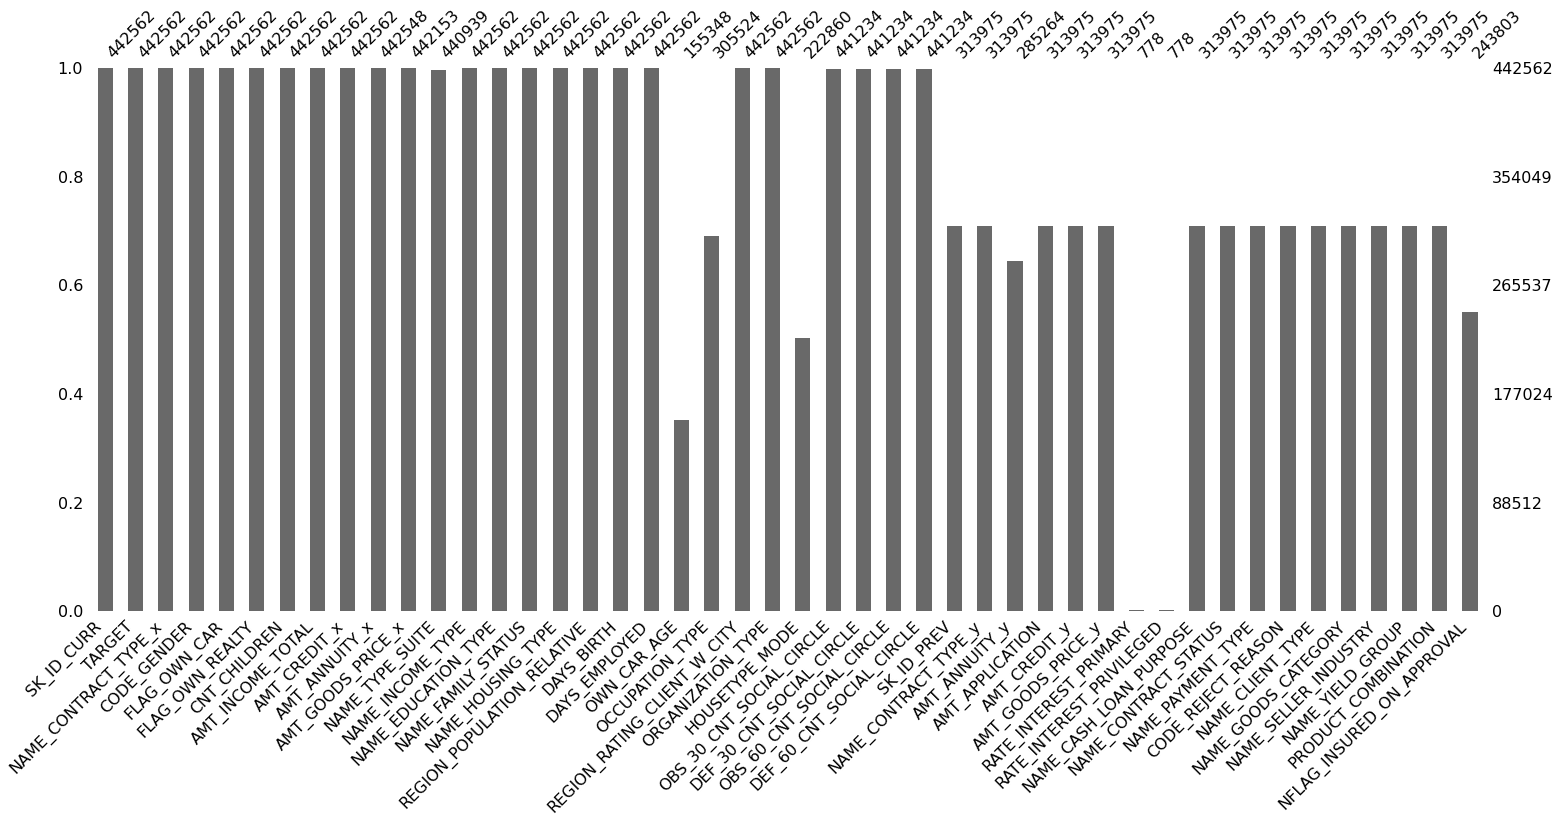

In [ ]:
msno.bar(NCB)
NCB = NCB.astype(
    {"TARGET":"category",
     "NAME_CONTRACT_TYPE_x":"category",
     "CODE_GENDER":"category",
     "FLAG_OWN_CAR":"category",
     "FLAG_OWN_REALTY":"category",
     "NAME_TYPE_SUITE":"category",
     "NAME_INCOME_TYPE":"category",
     "NAME_EDUCATION_TYPE":"category",
     "NAME_FAMILY_STATUS":"category",
     "NAME_HOUSING_TYPE":"category",
     "OCCUPATION_TYPE":"category",
     "REGION_RATING_CLIENT_W_CITY" : "category",
     "ORGANIZATION_TYPE" : "category",
     "HOUSETYPE_MODE" : "category",
     "NAME_CONTRACT_TYPE_y":"category",
     "NAME_CASH_LOAN_PURPOSE":"category",
     "NAME_CONTRACT_STATUS":"category",
     "NAME_PAYMENT_TYPE":"category",
     "CODE_REJECT_REASON":"category",
     "NAME_CLIENT_TYPE":"category",
     "NAME_GOODS_CATEGORY":"category",
     "NAME_SELLER_INDUSTRY":"category",
     "NAME_YIELD_GROUP":"category",
     "PRODUCT_COMBINATION":"category",
     "NFLAG_INSURED_ON_APPROVAL":"category"})
NCB.info()
    # [307511 * 47]이 아닌 [442562 * 47]인 이유

In [ ]:
NCB.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
                              ...  
NAME_YIELD_GROUP             128587
PRODUCT_COMBINATION          128587
NFLAG_INSURED_ON_APPROVAL    198759
Length: 46, dtype: int64

In [ ]:
NCB.sort_values(by = ["SK_ID_CURR"], ascending = True)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,NaN,Laborers,2,Business Entity Type 3,block of flats,2.0,2.0,2.0,2.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,NaN,NaN,XAP,Approved,XNA,XAP,New,Vehicles,Auto technology,low_normal,POS other with interest,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,NaN,Core staff,1,School,block of flats,1.0,0.0,1.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,Furniture,middle,POS industry with interest,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,26.0,Laborers,2,Government,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442560,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,NaN,Laborers,2,Business Entity Type 1,block of flats,0.0,0.0,0.0,0.0,1792910.0,Consumer loans,2296.440,18846.0,21456.0,18846.0,NaN,NaN,XAP,Approved,Cash through the bank,XAP,New,Mobile,Connectivity,high,POS mobile with interest,0.0
442559,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,NaN,Laborers,2,Business Entity Type 1,block of flats,0.0,0.0,0.0,0.0,2016407.0,Consumer loans,19065.825,223789.5,247423.5,223789.5,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Computers,Consumer electronics,low_normal,POS household with interest,1.0
442561,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,NaN,Laborers,1,Business Entity Type 3,block of flats,0.0,0.0,0.0,0.0,1743609.0,Consumer loans,11090.835,102037.5,112815.0,102037.5,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,Furniture,middle,POS industry with interest,0.0


In [ ]:
pd.set_option('display.max_row', 10)
NCB["SK_ID_CURR"].duplicated()
    # [과거 신용대출을 중복하여 받은 True 고객이 존재하기 때문]
    # [또는 과거 ID인 SK_ID_PREV가 다르지만 현재 ID인 SK_ID_CURR은 동일한 고객이 존재하기 때문]
NCB["duplicate"] = NCB.duplicated(["SK_ID_CURR"])
NCB[NCB["duplicate"] == True]
    # [135051명]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,duplicate
11,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,NaN,Core staff,2,Medicine,NaN,0.0,0.0,0.0,0.0,1461079.0,Consumer loans,11567.475,119272.500,131868.000,119272.500,NaN,NaN,XAP,Approved,Cash through the bank,XAP,New,Computers,Consumer electronics,low_action,POS household without interest,0.0,True
14,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,NaN,Laborers,2,Business Entity Type 2,block of flats,0.0,0.0,0.0,0.0,2824473.0,Consumer loans,7124.040,98500.500,98500.500,98500.500,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Computers,Consumer electronics,high,POS household with interest,0.0,True
17,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,NaN,Laborers,1,Transport: type 2,block of flats,0.0,0.0,0.0,0.0,2704445.0,Consumer loans,94906.035,536364.000,536364.000,536364.000,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Construction Materials,Construction,low_normal,POS industry with interest,0.0,True
18,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,NaN,Laborers,1,Transport: type 2,block of flats,0.0,0.0,0.0,0.0,1251951.0,Consumer loans,4180.365,36805.365,36805.365,36805.365,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,Connectivity,low_normal,POS mobile without interest,0.0,True
21,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,NaN,Drivers,2,Government,NaN,0.0,0.0,0.0,0.0,1074770.0,Consumer loans,5729.265,32512.500,35086.500,32512.500,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Repeater,Gardening,Consumer electronics,high,POS household with interest,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442547,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,-20390,-5326,NaN,NaN,2,Business Entity Type 3,block of flats,0.0,0.0,0.0,0.0,1967722.0,Cash loans,17232.030,135000.000,162778.500,135000.000,NaN,NaN,XNA,Refused,Cash through the bank,HC,Repeater,XNA,XNA,middle,Cash X-Sell: middle,NaN,True
442548,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,-20390,-5326,NaN,NaN,2,Business Entity Type 3,block of flats,0.0,0.0,0.0,0.0,1035930.0,Cash loans,21177.810,180000.000,191880.000,180000.000,NaN,NaN,Other,Approved,Cash through the bank,XAP,New,XNA,XNA,high,Cash Street: high,0.0,True
442552,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Si

### NCB에서 해당 기관의 과거 대출 이력이 없는 신규 고객 분리 후 새로운 데이터 프레임 생성

* NCB : 기존 고객 데이터 프레임
* NCB_new : 신규 고객 데이터 프레임

In [ ]:
NCB_NA_list = []
NCB_NA_col = NCB.iloc[:, [28, 29, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42]].columns.values
  # [128587행이 결측값인 변수명을 NCB_NA_col에 array 형태로 저장함]

In [ ]:
for i in range(0, 12, 1):
  NCB_NA_list.append(NCB_NA_col[i])
    # [NCB_NA_col의 dimension 1의 원소를 NCB_NA_list에 저장]

In [ ]:
is_NaN_0 = NCB[NCB_NA_list[0]].isnull()
is_NaN_1 = NCB[NCB_NA_list[1]].isnull()
is_NaN_2 = NCB[NCB_NA_list[2]].isnull()
is_NaN_3 = NCB[NCB_NA_list[3]].isnull()
is_NaN_4 = NCB[NCB_NA_list[4]].isnull()
is_NaN_5 = NCB[NCB_NA_list[5]].isnull()
is_NaN_6 = NCB[NCB_NA_list[6]].isnull()
is_NaN_7 = NCB[NCB_NA_list[7]].isnull()
is_NaN_8 = NCB[NCB_NA_list[8]].isnull()
is_NaN_9 = NCB[NCB_NA_list[9]].isnull()
is_NaN_10 = NCB[NCB_NA_list[10]].isnull()
is_NaN_11 = NCB[NCB_NA_list[11]].isnull()
  # [과거 여신금융활동 이력이 없는 신규 고객을 True, 아니면 False로 is_NA]
  # [Past 변수가 결측인 행을 확인]

In [ ]:
is_NaN_0.unique()

array([False,  True])

In [ ]:
NCB_new =  NCB[is_NaN_0 &is_NaN_1 & is_NaN_2 & is_NaN_3 & is_NaN_4 & is_NaN_5 & is_NaN_6 & is_NaN_7 & is_NaN_8 & is_NaN_9 & is_NaN_10 & is_NaN_11]
  # [Past 변수가 결측인 NCB 데이터 프레임의 행을 추출함]

In [ ]:
type(NCB_new)

pandas.core.frame.DataFrame

In [ ]:
NCB_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128587 entries, 2 to 442558
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   128587 non-null  int64   
 1   TARGET                       128587 non-null  category
 2   NAME_CONTRACT_TYPE_x         128587 non-null  category
 3   CODE_GENDER                  128587 non-null  category
 4   FLAG_OWN_CAR                 128587 non-null  category
 5   FLAG_OWN_REALTY              128587 non-null  category
 6   CNT_CHILDREN                 128587 non-null  int64   
 7   AMT_INCOME_TOTAL             128587 non-null  float64 
 8   AMT_CREDIT_x                 128587 non-null  float64 
 9   AMT_ANNUITY_x                128583 non-null  float64 
 10  AMT_GOODS_PRICE_x            128478 non-null  float64 
 11  NAME_TYPE_SUITE              127757 non-null  category
 12  NAME_INCOME_TYPE             128587 non-null

In [ ]:
NCB_index = NCB_new.index.values
  # [NCB_new 신규고객의 행 번호를 array 형태로 NCB_index에 저장함]

In [ ]:
NCB_index_list = []
for i in range(0, 128587, 1):
  NCB_index_list.append(NCB_index[i])
      # [NCB_index의 dimension 1의 원소를 NCB_index_list에 저장]

In [ ]:
NCB.drop(NCB_index_list, axis = 0, inplace = True)
  # [NCB 데이터 프레임 내 신규 고객 행 번호 제거하여 과거 여신금융활동 이력이 있는 고객만 존치함]

In [ ]:
NCB.shape

(313975, 47)

<AxesSubplot:>

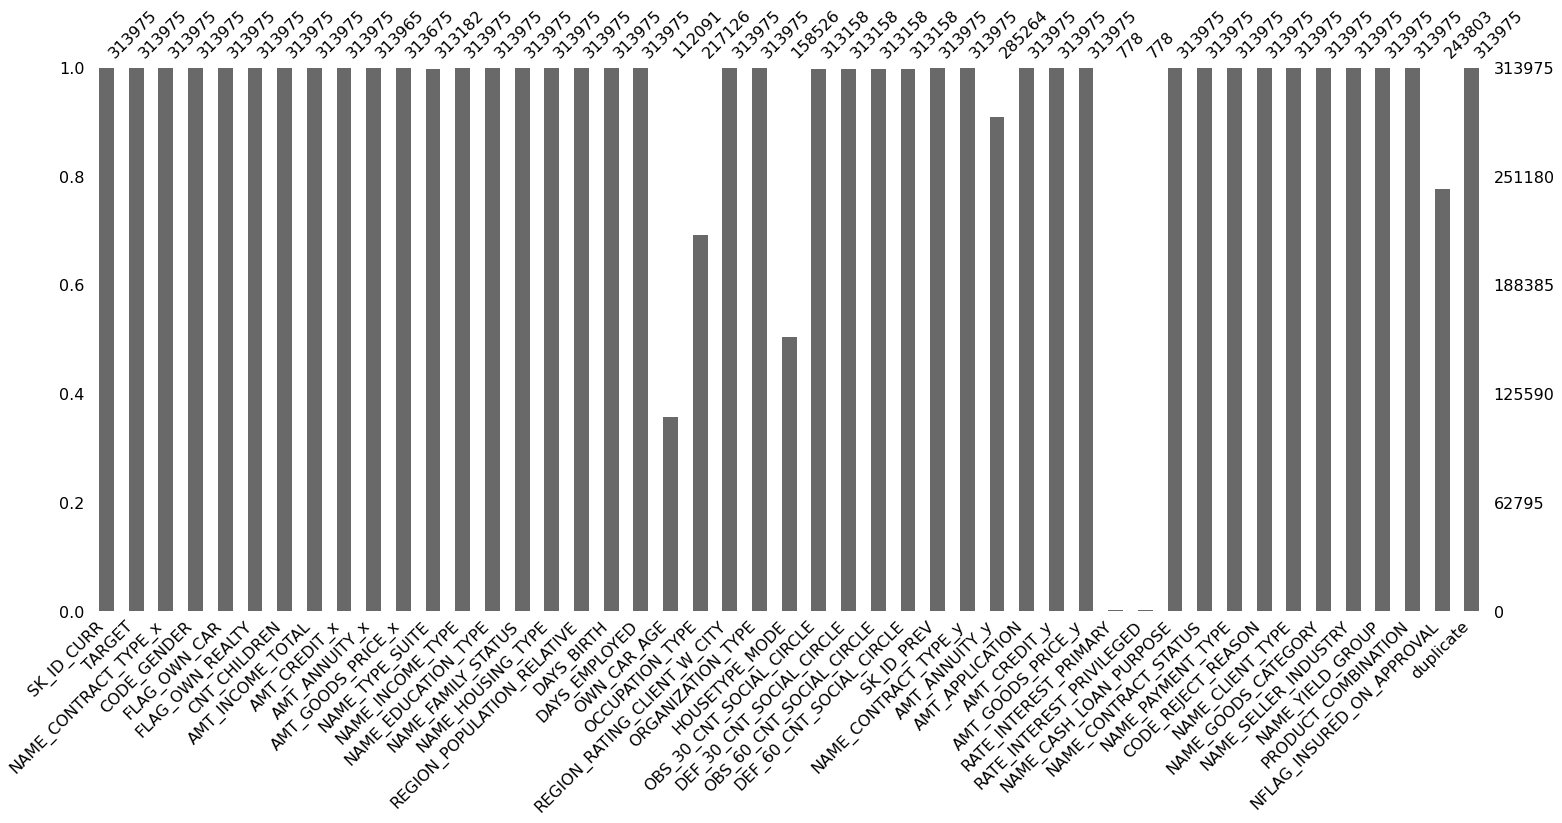

In [ ]:
msno.bar(NCB)
  # [결측값 시각화]

In [ ]:
NCB.drop(["OWN_CAR_AGE", "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"], axis = 1, inplace = True)

In [ ]:
NCB["duplicate"].unique()

array([False,  True])

In [ ]:
NCB["duplicate"] = NCB["duplicate"].astype("category")

In [ ]:
NCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313975 entries, 0 to 442561
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   313975 non-null  int64   
 1   TARGET                       313975 non-null  category
 2   NAME_CONTRACT_TYPE_x         313975 non-null  category
 3   CODE_GENDER                  313975 non-null  category
 4   FLAG_OWN_CAR                 313975 non-null  category
 5   FLAG_OWN_REALTY              313975 non-null  category
 6   CNT_CHILDREN                 313975 non-null  int64   
 7   AMT_INCOME_TOTAL             313975 non-null  float64 
 8   AMT_CREDIT_x                 313975 non-null  float64 
 9   AMT_ANNUITY_x                313965 non-null  float64 
 10  AMT_GOODS_PRICE_x            313675 non-null  float64 
 11  NAME_TYPE_SUITE              313182 non-null  category
 12  NAME_INCOME_TYPE             313975 non-null

In [ ]:
NCB["duplicate"] = np.where(NCB["duplicate"] == True, 1, 0)
  # NCB[NCB['duplicate']==True] 했을 때 duplicate이 True인 데이터만 추출됨을 확인

In [ ]:
NCB['duplicate'].unique()

array([0, 1])

In [ ]:
# NCB.to_csv("/content/drive/MyDrive/NCB.csv", index = False)

In [ ]:
pd.set_option('display.max_rows', None)
NCB.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_x                0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_x                        0
AMT_ANNUITY_x                      10
AMT_GOODS_PRICE_x                 300
NAME_TYPE_SUITE                   793
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
OCCUPATION_TYPE                 96849
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
HOUSETYPE_MODE                 155449
OBS_30_CNT_SOCIAL_CIRCLE          817
DEF_30_CNT_SOCIAL_CIRCLE          817
OBS_60_CNT_SOCIAL_CIRCLE          817
DEF_60_CNT_S

### MICE(연쇄방정식 기반 랜덤 포레스트 모델을 이용한 결측값 다중대체법) with R

In [ ]:
NCB_MICE = pd.read_csv("/content/drive/MyDrive/NCB_MICE_5.csv", index_col = False)

In [ ]:
NCB_MICE.shape

(313975, 40)

In [ ]:
NCB_MICE.isnull().sum()

Unnamed: 0                     0
NAME_CONTRACT_TYPE_x           0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_ANNUITY_x                  0
AMT_GOODS_PRICE_x              0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
HOUSETYPE_MODE                 0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
NAME_CONTRACT_TYPE_y           0
AMT_ANNUITY_y                  0
AMT_APPLICATION                0
AMT_GOODS_PRICE_y              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTR

In [ ]:
objectToCategory = NCB_MICE.select_dtypes(include = ["object"]).columns
len(objectToCategory)

22

In [ ]:
for i in range(0, 22, 1):
  NCB_MICE.loc[:, objectToCategory[i]] = NCB_MICE.loc[:, objectToCategory[i]].astype("category")
    # [문자형에서 범주형으로 자료형 변환]

In [ ]:
NCB_MICE.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
NCB_MICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313975 entries, 0 to 313974
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE_x         313975 non-null  category
 1   CODE_GENDER                  313975 non-null  category
 2   FLAG_OWN_CAR                 313975 non-null  category
 3   FLAG_OWN_REALTY              313975 non-null  category
 4   CNT_CHILDREN                 313975 non-null  int64   
 5   AMT_INCOME_TOTAL             313975 non-null  float64 
 6   AMT_ANNUITY_x                313975 non-null  float64 
 7   AMT_GOODS_PRICE_x            313975 non-null  float64 
 8   NAME_TYPE_SUITE              313975 non-null  category
 9   NAME_INCOME_TYPE             313975 non-null  category
 10  NAME_EDUCATION_TYPE          313975 non-null  category
 11  NAME_FAMILY_STATUS           313975 non-null  category
 12  NAME_HOUSING_TYPE            313975 non-null

In [ ]:
# 원본 데이터는 313975행이지만, 마운트하면 8088개 행만 로드되는 오류 발생 -> 해결

'''
# pd.set_option("display.max_row", 10)

is_NaN_MICE = NCB_MICE_5["NFLAG_INSURED_ON_APPROVAL"].isnull()
NCB_MICE_NaN = NCB_MICE_5[is_NaN_MICE]
NCB_MICE_NaN
  # [NCB_MICE_NaN 데이터 프레임] 8077번 1개 행 결측값 대체되지 않은 이유
'''
'''
NCB_MICE_5 = NCB_MICE_5.dropna()
NCB_MICE_5.drop("Unnamed: 0", axis = 1, inplace = True)
NCB_MICE_5.isnull().sum()
'''

'\nNCB_MICE_5 = NCB_MICE_5.dropna()\nNCB_MICE_5.drop("Unnamed: 0", axis = 1, inplace = True)\nNCB_MICE_5.isnull().sum()\n'

In [ ]:
# NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.contains(r"(industry: type)").replace("")

In [ ]:
# industry_type = NCB_MICE[NCB_MICE["ORGANIZATION_TYPE"].str.extract(r"(industry: type)") == True]

In [ ]:
# NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.contains(r"(industry: type)").replace("industry_type")

In [ ]:
NCB_MICE.loc[:, "ORGANIZATION_TYPE"].value_counts().sort_index()

Advertising                 370
Agriculture                2258
Bank                       2671
Business Entity Type 1     5929
Business Entity Type 2    11312
Business Entity Type 3    68790
Cleaning                    282
Construction               6514
Culture                     364
Electricity                 937
Emergency                   558
Government                10127
Hotel                       955
Housing                    3067
Industry: type 1           1009
Industry: type 10           166
Industry: type 11          2891
Industry: type 12           375
Industry: type 13            76
Industry: type 2            494
Industry: type 3           3469
Industry: type 4            951
Industry: type 5            717
Industry: type 6            109
Industry: type 7           1460
Industry: type 8             20
Industry: type 9           3626
Insurance                   451
Kindergarten               7090
Legal Services              217
Medicine                  11826
Military

In [ ]:
# 인코딩을 위한 지정되지 않은 범주 통합
entity_type = ["Business Entity Type 1", "Business Entity Type 2", "Business Entity Type 3"]
industry_type = ["Industry: type 1", "Industry: type 10", "Industry: type 11", "Industry: type 12", "Industry: type 13", "Industry: type 2", "Industry: type 3", "Industry: type 4", "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8", "Industry: type 9"]
trade_type = ["Trade: type 1", "Trade: type 2", "Trade: type 3", "Trade: type 4", "Trade: type 5", "Trade: type 6", "Trade: type 7"]
transport_type = ["Transport: type 1", "Transport: type 2", "Transport: type 3", "Transport: type 4"]

In [ ]:
for colnames in entity_type :
  NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.replace(colnames, "entity_type")
for colnames in industry_type :
  NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.replace(colnames, "Industry_type")
for colnames in trade_type :
  NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.replace(colnames, "trade_type")
for colnames in transport_type :
  NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.replace(colnames, "transport_type")

NCB_MICE.loc[:, "ORGANIZATION_TYPE"].value_counts().sort_index()

Advertising              370
Agriculture             2258
Bank                    2671
Cleaning                 282
Construction            6514
Culture                  364
Electricity              937
Emergency                558
Government             10127
Hotel                    955
Housing                 3067
Industry_type          11855
Industry_type0           166
Industry_type1          2891
Industry_type2           375
Industry_type3            76
Insurance                451
Kindergarten            7090
Legal Services           217
Medicine               11826
Military                2888
Mobile                   339
Other                  16382
Police                  2619
Postal                  2114
Realtor                  380
Religion                  84
Restaurant              1909
School                  8619
Security                3313
Security Ministries     2138
Self-employed          39580
Services                1680
Telecom                  562
University    

In [ ]:
industry_type = 0
industry_type = ["Industry_type0", "Industry_type1", "Industry_type2", "Industry_type3"]

for colnames in industry_type :
  NCB_MICE["ORGANIZATION_TYPE"] = NCB_MICE["ORGANIZATION_TYPE"].str.replace(colnames, "Industry_type")

NCB_MICE.loc[:, "ORGANIZATION_TYPE"].value_counts().sort_index()

Advertising              370
Agriculture             2258
Bank                    2671
Cleaning                 282
Construction            6514
Culture                  364
Electricity              937
Emergency                558
Government             10127
Hotel                    955
Housing                 3067
Industry_type          15363
Insurance                451
Kindergarten            7090
Legal Services           217
Medicine               11826
Military                2888
Mobile                   339
Other                  16382
Police                  2619
Postal                  2114
Realtor                  380
Religion                  84
Restaurant              1909
School                  8619
Security                3313
Security Ministries     2138
Self-employed          39580
Services                1680
Telecom                  562
University              1276
XNA                    55235
entity_type            86031
trade_type             16424
transport_type

In [ ]:
# 더미 코딩 (원 핫 인코딩)

NCB_MICE = pd.get_dummies(NCB_MICE)
NCB_MICE.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,NFLAG_INSURED_ON_APPROVAL,duplicate,NAME_CONTRACT_TYPE_x_Cash loans,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry_type,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_entity_type,ORGANIZATION_TYPE_trade_type,ORGANIZATION_TYPE_transport_type,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,NAME_CONTRACT_TYPE_y_Cash loans,NAME_CONTRACT_TYPE_y_Consumer loans,NAME_CONTRACT_TYPE_y_Revolving loans,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON

In [ ]:
NCB_MICE.columns.values

array(['TARGET', 'AMT_CREDIT_x', 'AMT_CREDIT_y', 'SK_ID_CURR',
       'SK_ID_PREV', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y',
       'NFLAG_INSURED_ON_APPROVAL', 'duplicate',
       'NAME_CONTRACT_TYPE_x_Cash loans',
       'NAME_CONTRACT_TYPE_x_Revolving loans', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner',
       'NAME_TYPE_SUITE_Unaccompanied',
       'NAME_INCOME_TYPE

### 주성분분석(Principal Component Analysis) 연속형 변수 특징선택

In [ ]:
pca_col_index = NCB_MICE.select_dtypes(include = ["int64", "float64"]).columns.values
  # [주성분분석하여 특징 선택할 연속형 변수명 인덱스에 저장함]
len(pca_col_index)

17

In [ ]:
pca_col_list = []

for i in range(0, 17, 1):
  pca_col_list.append(pca_col_index[i])
print(pca_col_list, end = "")

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y', 'NFLAG_INSURED_ON_APPROVAL', 'duplicate']

In [ ]:
pca_col = NCB_MICE.loc[:, pca_col_list]

In [ ]:
pca_col = pd.DataFrame(StandardScaler().fit_transform(pca_col))
    # [표준화]
pca_col.columns = pca_col_list

In [ ]:
# 최적 components 구하기

pca1 = PCA(n_components = 17)
pca_array1 = pca1.fit_transform(pca_col)
pca_nrate_1 = pd.DataFrame(pca_array1, columns = [f"pca{num+1}" for num in range(pca_col.shape[1])])

In [ ]:
# 주성분의 설명력과 누적기여율(누적분산비) 구하기

result1 = pd.DataFrame({'설명 가능한 분산 비율(고윳값)' : pca1.explained_variance_,
                        '기여율' : pca1.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(pca_col.shape[1])]))
result1['누적기여율'] = result1['기여율'].cumsum()
result1
    # [pca9 누적기여율 : 0.837420]

,설명 가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.901886e+00,1.706986e-01,0.170699
pca2,2.459537e+00,1.446782e-01,0.315377
pca3,1.711460e+00,1.006738e-01,0.416051
pca4,1.462054e+00,8.600292e-02,0.502053
pca5,1.379982e+00,8.117515e-02,0.583229
pca6,1.317991e+00,7.752863e-02,0.660757
pca7,1.066111e+00,6.271220e-02,0.723469
pca8,9.767036e-01,5.745297e-02,0.780922
pca9,9.604655e-01,5.649779e-02,0.837420
pca10,9.090484e-01,5.347327e-02,0.890894


In [ ]:
pca1.explained_variance_

array([2.90188596e+00, 2.45953661e+00, 1.71145980e+00, 1.46205421e+00,
       1.37998200e+00, 1.31799088e+00, 1.06611084e+00, 9.76703579e-01,
       9.60465476e-01, 9.09048448e-01, 6.55991611e-01, 5.00349956e-01,
       3.36347822e-01, 2.22667731e-01, 1.36161940e-01, 3.29727024e-03,
       5.55385678e-32])

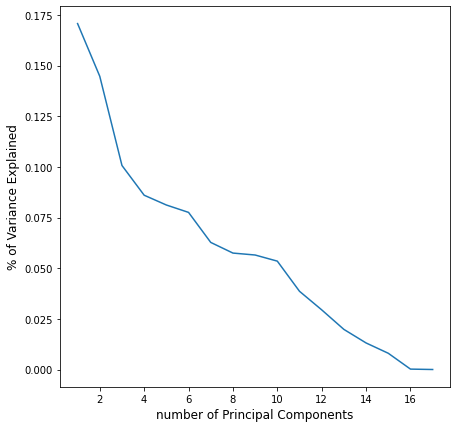

In [ ]:
# Scree Plot

plt.rcParams['figure.figsize'] = (7,7)
plt.plot(range(1, pca_col.shape[1]+1), pca1.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize = 12)
plt.ylabel("% of Variance Explained", fontsize = 12)
plt.show()
    # [pca9]

In [ ]:
# n_components = 9

pca = PCA(n_components = 9)
pca_array = pca.fit_transform(pca_col)
pca_nrate = pd.DataFrame(pca_array, columns = [f"pca{num+1}" for num in range(0,9,1)])
pca_nrate.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-0.224936,4.363245,-1.192999,-1.879253,4.189012,0.907425,-1.034603,0.191936,0.164540
1,6.293984,0.177056,-0.921165,0.402597,0.044718,-0.044455,-1.106813,0.159471,-0.037730
2,1.197605,-0.855396,-0.353605,-0.898105,-0.142105,0.077615,-1.023212,-0.367642,-0.046400
3,0.807994,-0.426834,2.548254,0.478207,0.401806,0.442860,-0.807005,-0.763186,-0.248557
4,3.036508,0.248361,0.250833,2.395694,0.890152,-2.257646,-1.113736,0.715313,0.024587


<AxesSubplot:>

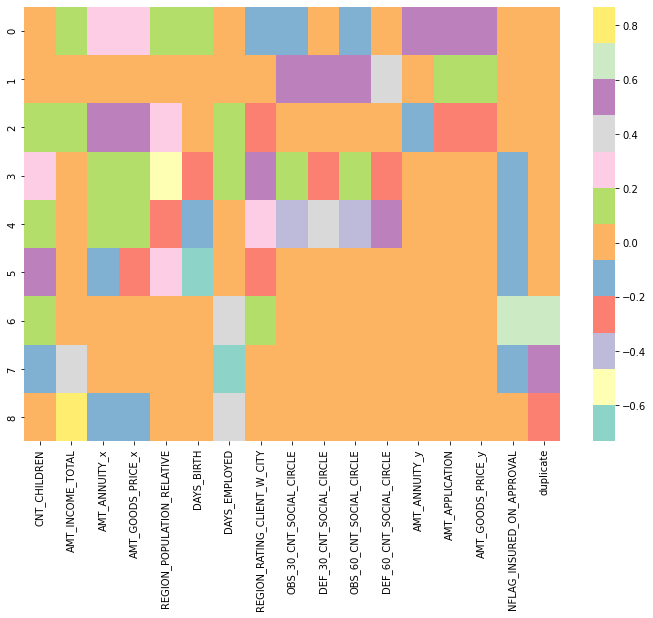

In [ ]:
# PCA 객체의 속성에 저장된 구성요소(원본 데이터 pca_col의 변수 조합)을 해석하는 히트맵

map = pd.DataFrame(pca.components_, columns=pca_col.columns)
plt.figure(figsize = (12,8))
sns.heatmap(map, cmap = "Set3") # "coolwarm"
    # [components = 1 : "AMT_APPLICATION", "AMT_PRICE_y", "NFLAG_INSURED_ON_APPROVAL"]
    # [components = 2 : "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]
    # [components = 3 : "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "REGION_POPULATION_RELATIVE"]

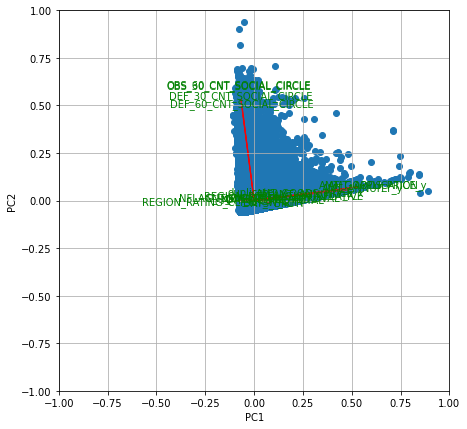

In [ ]:
def biplot(pca, coeff, labels = None):
  pc1 = pca[:, 0]
  pc2 = pca[:, 1]

  n = coeff.shape[0]
  scalepc1 = 1.0/(pc1.max() - pc1.min())
  scalepc2 = 1.0/(pc2.max() - pc2.min())
    # [MinMaxScale]
  plt.scatter(pc1 * scalepc1, pc2 * scalepc2)

  for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],
              color = "r", alpha = 0.5)
      # [loadings : Coefficients]

    if labels is None:
      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
               "Var" + str(i+1), color = "g", ha = "center", va = "center")
    else:
      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
               labels[i], color = "g", ha = "center", va = "center")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
  # [PC1]
plt.ylabel("PC{}".format(2))
  # [PC2]

plt.grid()
biplot(pca_array[:, 0:2], np.transpose(pca.components_[0:2, :]),labels = pca_col.columns.values)

In [ ]:
'''
def biplot(pca, coeff, labels = None):
  pc2 = pca[:, 1]
  pc3 = pca[:, 2]
    # [IndexError: index 2 is out of bounds for axis 1 with size 2]

  n = coeff.shape[0]
  scalepc2 = 1.0/(pc2.max() - pc2.min())
  scalepc3 = 1.0/(pc3.max() - pc3.min())
    # [MinMaxScale]
  plt.scatter(pc2 * scalepc2, pc3 * scalepc3)

  for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],
              color = "r", alpha = 0.5)
      # [loadings : Coefficients]

    if labels is None:
      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
               "Var" + str(i+1), color = "g", ha = "center", va = "center")
    else:
      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
               labels[i], color = "g", ha = "center", va = "center")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(2))
  # [PC2]
plt.ylabel("PC{}".format(3))
  # [PC3]

plt.grid()
biplot(pca_array[:, 1:3], np.transpose(pca.components_[1:3, :]),labels = pca_col.columns.values)
'''

'\ndef biplot(pca, coeff, labels = None):\n  pc2 = pca[:, 1]\n  pc3 = pca[:, 2]\n    # [IndexError: index 2 is out of bounds for axis 1 with size 2]\n\n  n = coeff.shape[0]\n  scalepc2 = 1.0/(pc2.max() - pc2.min())\n  scalepc3 = 1.0/(pc3.max() - pc3.min())\n    # [MinMaxScale]\n  plt.scatter(pc2 * scalepc2, pc3 * scalepc3)\n\n  for i in range(n):\n    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], \n              color = "r", alpha = 0.5)\n      # [loadings : Coefficients]\n\n    if labels is None: \n      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, \n               "Var" + str(i+1), color = "g", ha = "center", va = "center")\n    else:\n      plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, \n               labels[i], color = "g", ha = "center", va = "center")\n\nplt.xlim(-1, 1)\nplt.ylim(-1, 1)\nplt.xlabel("PC{}".format(2))\n  # [PC2]\nplt.ylabel("PC{}".format(3))\n  # [PC3]\n\nplt.grid()\nbiplot(pca_array[:, 1:3], np.transpose(pca.components_[1:3, :]),labels = pca_col.columns.values

### 결측값 대체 시 일시적으로 제거했던 ID 변수 및 종속변수 불러오기

In [ ]:
'''
NCB_MICE["TARGET"] = NCB["TARGET"]
NCB_MICE["AMT_CREDIT_x"] = NCB["AMT_CREDIT_x"]
NCB_MICE["AMT_CREDIT_y"] = NCB["AMT_CREDIT_y"]
NCB_MICE["SK_ID_CURR"] = NCB["SK_ID_CURR"]
NCB_MICE["SK_ID_PREV"] = NCB["SK_ID_PREV"]
'''
  # [결측값 대체 시 일시적으로 제거했던 ID 변수 및 종속변수 불러오기]

'\nNCB_MICE["TARGET"] = NCB["TARGET"]\nNCB_MICE["AMT_CREDIT_x"] = NCB["AMT_CREDIT_x"]\nNCB_MICE["AMT_CREDIT_y"] = NCB["AMT_CREDIT_y"]\nNCB_MICE["SK_ID_CURR"] = NCB["SK_ID_CURR"]\nNCB_MICE["SK_ID_PREV"] = NCB["SK_ID_PREV"]\n'

In [ ]:
'''
NCB_MICE.info()
  # [TARGET, AMT_CREDIT, ID 변수에 없던 결측값이 왜 생겼는지 이유 탐색]
    # 대안 1 : NCB의 종속변수 등 5개변수 데이터 프레임과 NCB_MICE 데이터 프레임 OUTER_JOIN하기
    # 대안 2 : R에서 기존 변수 붙이기
'''

'\nNCB_MICE.info()\n  # [TARGET, AMT_CREDIT, ID 변수에 없던 결측값이 왜 생겼는지 이유 탐색]\n    # 대안 1 : NCB의 종속변수 등 5개변수 데이터 프레임과 NCB_MICE 데이터 프레임 OUTER_JOIN하기\n    # 대안 2 : R에서 기존 변수 붙이기\n'

In [ ]:
pd.set_option("display.max_row", 6)
NCB_DV = NCB.loc[:, ["TARGET", "AMT_CREDIT_x", "AMT_CREDIT_y", "SK_ID_CURR", "SK_ID_PREV"]]
NCB_DV = NCB_DV.reset_index()
NCB_DV.drop("index", axis = 1, inplace = True)
  # [기존 NCB_DV의 0 ~ 442562 행 번호 제거]
NCB_DV

,TARGET,AMT_CREDIT_x,AMT_CREDIT_y,SK_ID_CURR,SK_ID_PREV
0,1,406597.5,179055.0,100002,1038818.0
1,0,1293502.5,348637.5,100003,2636178.0
2,0,490495.5,162598.5,100008,2218188.0
...,...,...,...,...,...
313972,1,370107.0,247423.5,456254,2016407.0
313973,1,370107.0,21456.0,456254,1792910.0
313974,0,675000.0,112815.0,456255,1743609.0


In [ ]:
# 대안 1
NCB_MICE = pd.concat(
    [NCB_DV, NCB_MICE],
    axis = 1, ignore_index = False
)
  # [ignore_index 파라미터] Passing ignore_index=True will drop all name references = 기존 index 무시
NCB_MICE

,TARGET,AMT_CREDIT_x,AMT_CREDIT_y,SK_ID_CURR,SK_ID_PREV,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,NFLAG_INSURED_ON_APPROVAL,duplicate,NAME_CONTRACT_TYPE_x_Cash loans,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry_type,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_entity_type,ORGANIZATION_TYPE_trade_type,ORGANIZATION_TYPE_transport_type,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,NAME_CONTRACT_TYPE_y_Cash loans,NAME_CONTRACT_TYPE_y_Consumer loans,NAME_CONTRACT_TYPE_y_Revolving loans,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash fro

<AxesSubplot:>

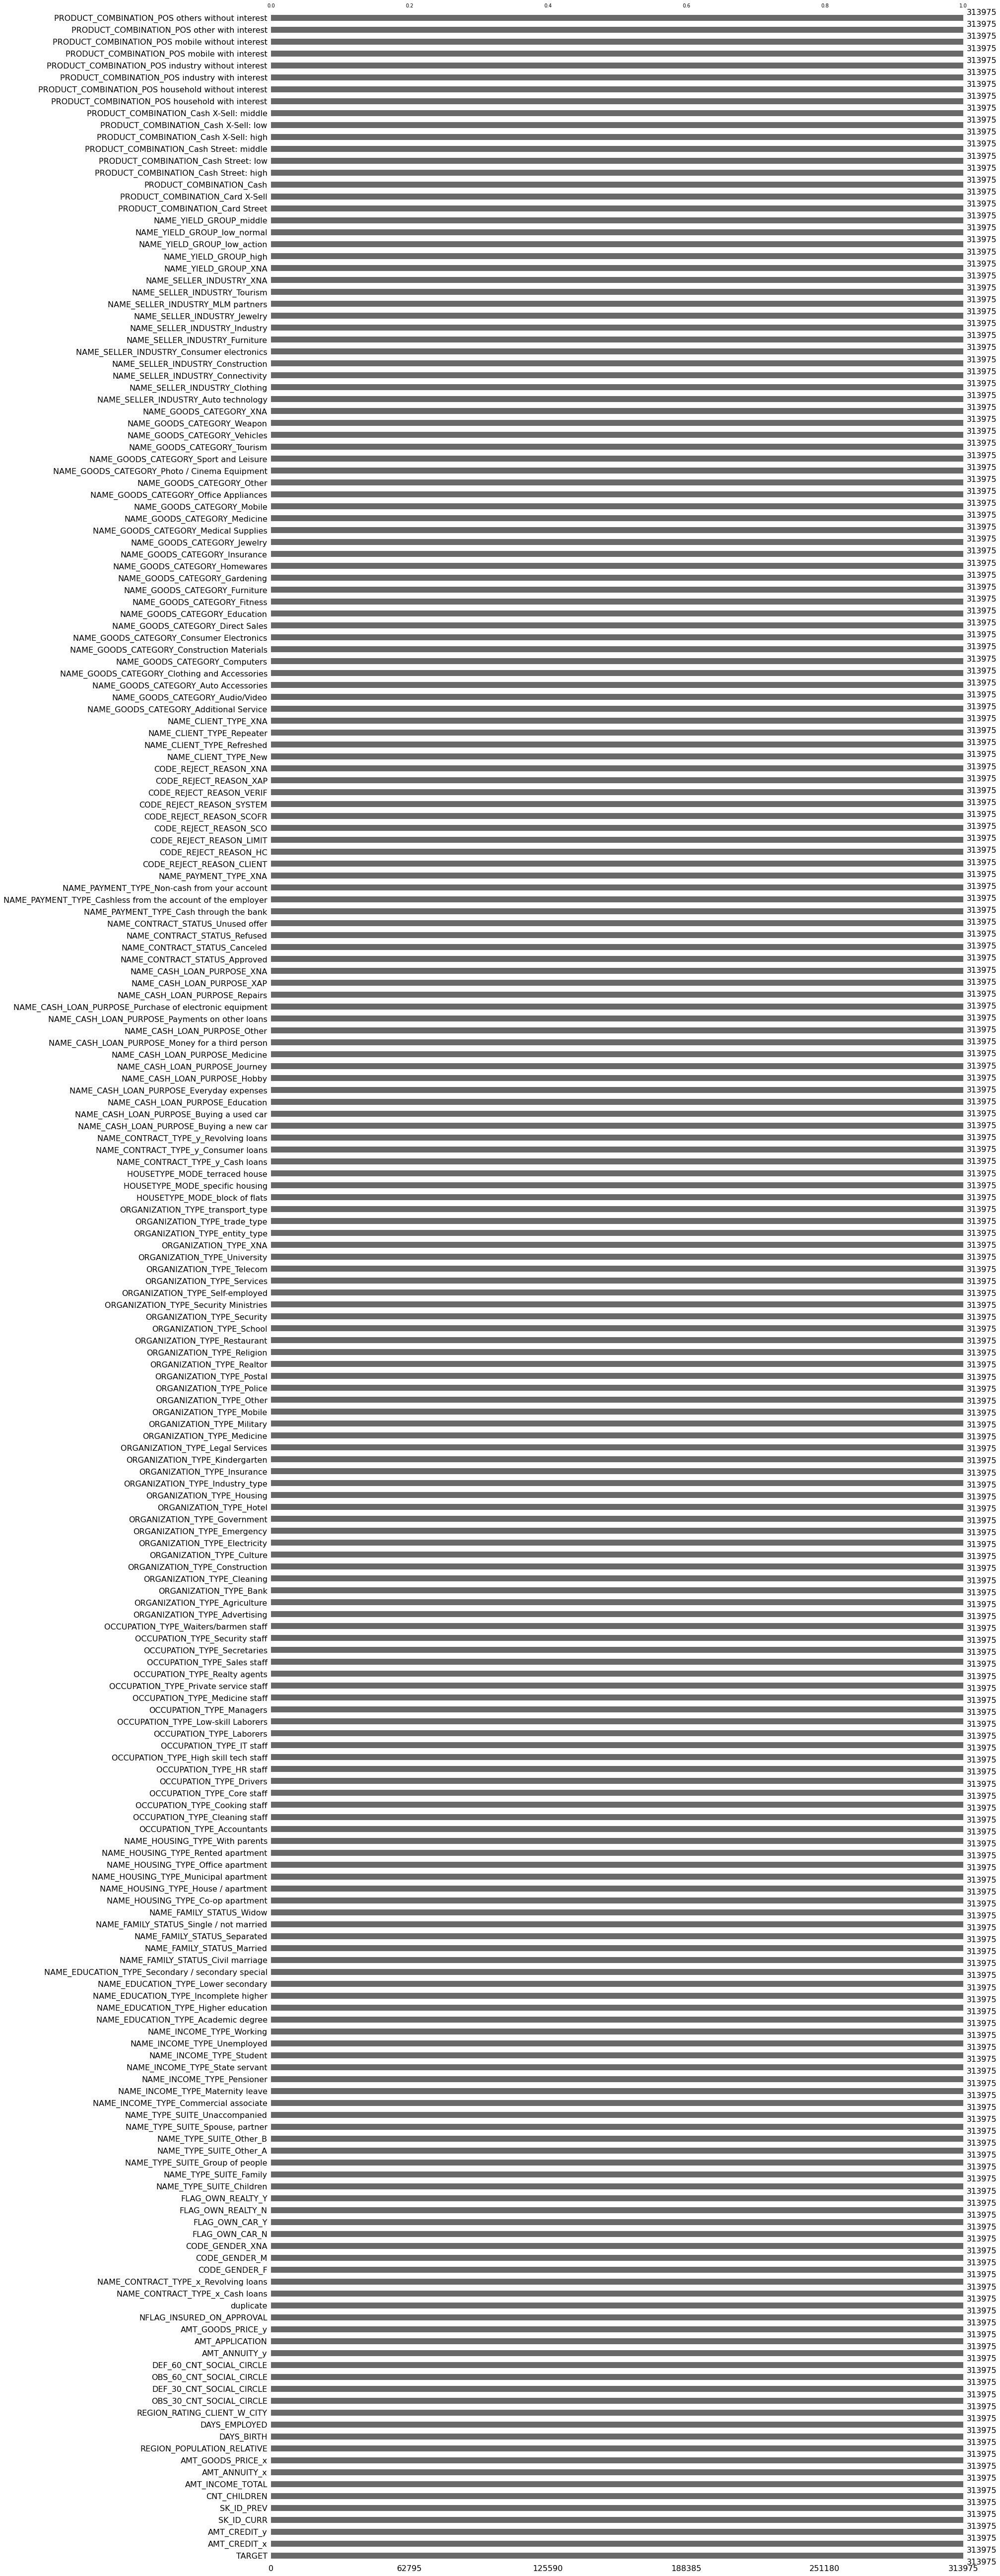

In [ ]:
msno.bar(NCB_MICE)

In [ ]:
NCB_MICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313975 entries, 0 to 313974
Columns: 214 entries, TARGET to PRODUCT_COMBINATION_POS others without interest
dtypes: category(1), float64(10), int64(11), uint8(192)
memory usage: 108.1 MB


### F-통계량 및 상호정보량 기반 필터링 (연속형 특징선택 목적)



```
{'DAYS_EMPLOYED', 'AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'DAYS_BIRTH', 'AMT_GOODS_PRICE_x', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y'}
```





In [ ]:
x1 = 0
x2 = 0

x1 = NCB_MICE.select_dtypes(include = ["category", "object"])
x2 = NCB_MICE.select_dtypes(include = ["int", "float"])
x2.drop(["SK_ID_CURR", "SK_ID_PREV", "AMT_CREDIT_y"], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
y1 = 0
y2 = 0

y1 = x1["TARGET"]
  # [이진 범주형 종속변수]
y2 = x2["AMT_CREDIT_x"]
  # [연속형 종속변수]

In [ ]:
x1 = x1.drop("TARGET", axis = 1)
x2 = x2.drop("AMT_CREDIT_x", axis = 1)

In [ ]:
print(x1.columns.values, "\n", x2.columns.values)

[] 
 ['CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_ANNUITY_x' 'AMT_GOODS_PRICE_x'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'REGION_RATING_CLIENT_W_CITY' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'AMT_ANNUITY_y' 'AMT_APPLICATION'
 'AMT_GOODS_PRICE_y' 'NFLAG_INSURED_ON_APPROVAL' 'duplicate']


In [ ]:
# 범주형 x1, y1(TARGET) 및 연속형 x2, y2(AMT_CREDIT_x)의 훈련 및 검증용 데이터 셋 분할

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 2022)
  # factor(x1) & factor(y1) filtering
x2_train_numfac, x2_test_numfac, y1_train_nf, y1_test_nf = train_test_split(x2, y1, test_size = 0.2, random_state = 2023)
  # numeric(x2) & factor(y1) filtering
x2_train_numeric, x2_test_numeric, y2_train_nn, y2_test_nn = train_test_split(x2, y2, test_size = 0.2, random_state = 2023)
  # numeric(x2) & numeric(y2) filtering

In [ ]:
print("x2_train_nf[row, col] :", x2_train_numfac.shape)
print("y1_train_nf[row, col] :", y1_train_nf.shape)
print("x2_train_nn[row, col] :", x2_train_numeric.shape)
print("y2_train_nn[row, col] :", y2_train_nn.shape)

x2_train_nf[row, col] : (251180, 17)
y1_train_nf[row, col] : (251180,)
x2_train_nn[row, col] : (251180, 17)
y2_train_nn[row, col] : (251180,)


In [ ]:
# numeric 독립변수인 x2_train_nf, x2_test_nf, x2_train_nn, x2_test_nn을 분리하여 Robust Scaling

robust_scaler = RobustScaler()
  # [변형 객체 저장] 평균과 분산 대신에 중간 값과 사분위 값을 사용하여 이상치 영향 최소화
    # 모든 스케일러 처리 전 이상치 제거가 선행되어야 하지만,
    # 차원의 저주를 먼저 해결한 후 이상치 탐지 및 판정 후 처리기준 수립할 계획

robust_scaler.fit(x2_train_numfac)
robust_scaler.fit(x2_train_numeric)
  # [훈련용 데이터 셋의 모수 분포 저장]

x2_train_nf = robust_scaler.transform(x2_train_numfac)
x2_train_nn = robust_scaler.transform(x2_train_numeric)
  # [훈련 데이터 스케일링]
x2_test_nf = robust_scaler.transform(x2_test_numfac)
x2_test_nn = robust_scaler.transform(x2_test_numeric)
  # [검증 데이터 스케일링]

x2_train_nf = pd.DataFrame(x2_train_nf, columns = x2_train_numfac.columns.values)
x2_train_nn = pd.DataFrame(x2_train_nn, columns = x2_train_numeric.columns.values)
x2_test_nf = pd.DataFrame(x2_test_nf, columns = x2_test_numfac.columns.values)
x2_test_nn = pd.DataFrame(x2_test_nf, columns = x2_test_numeric.columns.values)

In [ ]:
# F-통계량이 높은 6개 연속형 변수(특징) 선택
  # DV : AMT_CREDIT(대출금액)
  # 분산비율

f_num = SelectKBest(f_regression, k = 6)
f_num.fit(x2_train_nn, y2_train_nn)
  # [인스턴스 f_num(feature_numeric) 생성]
selected_numeric = x2_train_nn.columns[f_num.get_support()]
  # [인스턴스를 인덱스로 사용하여 선택된 6개 변수를 특징 목록 selected_numeric으로 저장]
print("selected_numeric :", selected_numeric)
  # ['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_EMPLOYED', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y']

# train 데이터와 test 데이터상 필터링 결과가 동질적인지 확인

f_num_test = SelectKBest(f_regression, k = 6)
f_num_test.fit(x2_test_nn, y2_test_nn)
selected_numeric_test = x2_test_nn.columns[f_num_test.get_support()]
print("selected_numeric_test :", selected_numeric_test)
  # ['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y']

selected_numeric : Index(['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_EMPLOYED', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_GOODS_PRICE_y'],
      dtype='object')
selected_numeric_test : Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y'],
      dtype='object')


In [ ]:
# 상호 정보량이 높은 6개 연속형 변수(IV, 특징) 선택
  # DV : AMT_CREDIT(대출금액)
  # Frequent Pattern이나 Apriori algorithm처럼 연산량 높다고 판단

f_num2 = SelectKBest(mutual_info_regression, k = 6)
  # [X확률과 Y확률 중 두 사건 X,Y가 동시에 일어날 확률 측정]
    # MutualInformation(X, Y) = P(X∩Y) / P(X)*P(Y)
f_num2.fit(x2_train_nn, y2_train_nn)
selected_numeric2 = x2_train_nn.columns[f_num2.get_support()]
print("selected_numeric2 :", selected_numeric2)
  # ['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# train 데이터와 test 데이터상 필터링 결과가 동질적인지 확인

f_num2_test = SelectKBest(mutual_info_regression, k = 6)
f_num2_test.fit(x2_test_nn, y2_test_nn)
selected_numeric2_test = x2_test_nn.columns[f_num2_test.get_support()]
print("selected_numeric2_test :", selected_numeric2_test)
  # ['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

selected_numeric2 : Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='object')
selected_numeric2_test : Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='object')


In [ ]:
selected_num_list = []

for i in range(0, 6, 1):
    selected_num_list.append(selected_numeric[i])
    if i == 5:
      print(type(selected_num_list))
      print(selected_num_list)
    else: pass

<class 'list'>
['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_EMPLOYED', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y']


In [ ]:
selected_num_list2 = []

for i in range(0, 6, 1):
    selected_num_list2.append(selected_numeric2[i])
    if i == 5:
      print(type(selected_num_list2))
      print(selected_num_list2)
    else: pass

<class 'list'>
['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']


In [ ]:
pca_numeric = ["OBS_80_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCAIL_CIRCLE", "AMT_ANNUITY_y", "AMT_APPLICATION", "AMT_GOOD_PRICES_y"]

In [ ]:
print("\n",
      [x for i in selected_num_list for x in selected_num_list2 if i in x],
      "\n",
      [x for i in selected_num_list for x in pca_numeric if i in x],
      "\n",
      [x for i in selected_num_list2 for x in pca_numeric if i in x])


 ['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_EMPLOYED'] 
 ['AMT_ANNUITY_y', 'AMT_APPLICATION'] 
 []


In [ ]:
y1_train_nf = pd.DataFrame(y1_train_nf)

In [ ]:
y1_train_nf.groupby(["TARGET"]).size()

TARGET
0    230635
1     20545
dtype: int64

In [ ]:
# F-통계량이 높은 6개 연속형 변수(특징) 선택
  # DV : TARGET(개인/가계신용대출 상환 여부)

f_numfac = SelectKBest(f_classif, k = 6)
f_numfac.fit(x2_train_nf, y1_train_nf)
selected_numfac = x2_train_nf.columns[f_numfac.get_support()]
print("selected_numfac :", selected_numfac)
  # ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY_y']

# train 데이터와 test 데이터상 필터링 결과가 동질적인지 확인

f_numfac_test = SelectKBest(f_classif, k = 6)
f_numfac_test.fit(x2_test_nf, y1_test_nf)
selected_numfac_test = x2_test_nf.columns[f_numfac_test.get_support()]
print("selected_numfac_test :", selected_numfac_test)
  # ['AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'AMT_ANNUITY_y']

selected_numfac : Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_ANNUITY_y'],
      dtype='object')
selected_numfac_test : Index(['AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'AMT_ANNUITY_y'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 상호 정보량이 높은 6개 연속형 변수(IV, 특징) 선택
  # DV : TARGET(개인/가계신용대출 상환 여부)

f_numfac2 = SelectKBest(mutual_info_classif, k = 6)
f_numfac2.fit(x2_train_nf, y1_train_nf)
selected_numfac2 = x2_train_nf.columns[f_numfac2.get_support()]
print("selected_numfac2 :", selected_numfac2)
  # ['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'duplicate']

# train 데이터와 test 데이터상 필터링 결과가 동질적인지 확인

f_numfac2_test = SelectKBest(mutual_info_classif, k = 6)
f_numfac2_test.fit(x2_test_nf, y1_test_nf)
selected_numfac2_test = x2_test_nn.columns[f_numfac2_test.get_support()]
print("selected_numfac2_test :", selected_numfac2_test)
  # ['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'duplicate']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


selected_numfac2 : Index(['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'AMT_GOODS_PRICE_y', 'duplicate'],
      dtype='object')
selected_numfac2_test : Index(['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'duplicate'],
      dtype='object')


In [ ]:
selected_numfac_list = []

for i in range(0, 6, 1):
    selected_numfac_list.append(selected_numfac[i])
    if i == 5:
      print(type(selected_numfac_list))
      print(selected_numfac_list)
    else: pass

<class 'list'>
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY_y']


In [ ]:
selected_numfac_list2 = []

for i in range(0, 6, 1):
    selected_numfac_list2.append(selected_numfac2[i])
#    if i == 5:
#      print(type(selected_numfac_list2))
#      print(selected_numfac_list2)
#    else: pass
print(selected_numfac_list2)

['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE_y', 'duplicate']


In [ ]:
# 클린 코드로 바꿀 것 : for문 형식 리스트 컴프리핸션 버전(리스트 원소 교집합)

print("\n",
      *[x for i in selected_num_list for x in selected_num_list2 if i in x],
      "\n",
      *[x for i in selected_num_list for x in pca_numeric if i in x],
      "\n",
      *[x for i in selected_num_list2 for x in pca_numeric if i in x],
      "\n",
      *[x for i in selected_numfac_list for x in selected_numfac_list2 if i in x],
      "\n",
      *[x for i in selected_numfac_list for x in pca_numeric if i in x],
      "\n",
      *[x for i in selected_numfac_list2 for x in pca_numeric if i in x],
      "\n",
      *[x for i in selected_num_list for x in selected_numfac_list if i in x],
      "\n",
      *[x for i in selected_num_list for x in selected_numfac_list2 if i in x],
      "\n",
      *[x for i in selected_num_list2 for x in selected_numfac_list if i in x],
      "\n",
      *[x for i in selected_num_list2 for x in selected_numfac_list2 if i in x])


 AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_EMPLOYED 
 AMT_ANNUITY_y AMT_APPLICATION 
 
 DAYS_BIRTH DAYS_EMPLOYED 
 AMT_ANNUITY_y 
 
 DAYS_EMPLOYED AMT_ANNUITY_y 
 AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_EMPLOYED AMT_GOODS_PRICE_y 
 DAYS_BIRTH DAYS_EMPLOYED 
 AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_BIRTH DAYS_EMPLOYED


In [ ]:
# 클린 코드 : 넘파이 배열 버전(리스트 원소 교집합)

totalNumericSelection = [
    selected_num_list, selected_num_list2,
    pca_numeric,
    selected_numfac_list, selected_numfac_list2
]
  # [리스트를 원소로 하는 리스트]

In [ ]:
intersection = 0

In [ ]:
intersection: list = []
# intersection: set = {}
  # [타입 어노테이션]
  # [def 함수명(<필수 인자>: <인자 타입>, <선택 인자>: <인자 타입> = <기본값>) -> <반환 타입>:]

for alist in totalNumericSelection :
  for blist in totalNumericSelection :
    # [5개의 리스트를 담은 리스트 중 순서대로 1개의 리스트 추출]
    if alist == blist :
      # [중복되는 리스트는 교집합 구하지 않고 통과]
      pass
    else:
      print(*np.intersect1d(alist, blist))
        # [두 개의 1차원 배열 alist, blist 의 교집합을 정렬하여 반환하되]
        # [*(에스더리스크)를 붙여 리스트에서 중복되는 원소만 반환]

      intersection = np.intersect1d(alist, blist)

AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_EMPLOYED
AMT_ANNUITY_y AMT_APPLICATION
AMT_ANNUITY_y DAYS_EMPLOYED
AMT_ANNUITY_x AMT_GOODS_PRICE_x AMT_GOODS_PRICE_y DAYS_EMPLOYED
AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_EMPLOYED

DAYS_BIRTH DAYS_EMPLOYED
AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_BIRTH DAYS_EMPLOYED
AMT_ANNUITY_y AMT_APPLICATION

AMT_ANNUITY_y

AMT_ANNUITY_y DAYS_EMPLOYED
DAYS_BIRTH DAYS_EMPLOYED
AMT_ANNUITY_y
DAYS_BIRTH DAYS_EMPLOYED
AMT_ANNUITY_x AMT_GOODS_PRICE_x AMT_GOODS_PRICE_y DAYS_EMPLOYED
AMT_ANNUITY_x AMT_GOODS_PRICE_x DAYS_BIRTH DAYS_EMPLOYED

DAYS_BIRTH DAYS_EMPLOYED


In [ ]:
np.unique(intersection)
  # [모든 리스트의 교집합]

array(['DAYS_BIRTH', 'DAYS_EMPLOYED'], dtype='<U27')

In [ ]:
featureSelection: set = {}

featureSelection = {
    "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED",
    "AMT_ANNUITY_y", "AMT_APPLICATION",
    "AMT_ANNUITY_y", "DAYS_EMPLOYED",
    "AMT_ANNUITY_x", "AMT_APPLICATION", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED",
    "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED",

    "DAYS_BIRTH", "DAYS_EMPLOYED",
    "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_BIRTH", "DAYS_EMPLOYED",
    "AMT_ANNUITY_y", "AMT_APPLICATION",
    "AMT_ANNUITY_y",
    "AMT_APPLICATION",

    "AMT_ANNUITY_y", "DAYS_EMPLOYED",
    "DAYS_BIRTH", "DAYS_EMPLOYED",
    "AMT_ANNUITY_y",
    "DAYS_BIRTH", "DAYS_EMPLOYED",
    "AMT_ANNUITY_x", "AMT_APPLICATION", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED",
    "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_BIRTH", "DAYS_EMPLOYED",
    "AMT_APPLICATION",
    "DAYS_BIRTH", "DAYS_EMPLOYED"}

In [ ]:
featureSelection

{'AMT_ANNUITY_x',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE_x',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED'}

In [ ]:
featureSelection1 = {
    "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED", "AMT_ANNUITY_y", "AMT_APPLICATION",
    "DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_ANNUITY_y",
    "DAYS_EMPLOYED", "AMT_ANNUITY_y", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_EMPLOYED", "AMT_GOODS_PRICE_y",
    "DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_ANNUITY_x", "AMT_GOODS_PRICE_x", "DAYS_BIRTH", "DAYS_EMPLOYED"
}
  # [정규화(MinMax 스케일링)하여 선택한 특징(연속형 변수)]
  # [중복을 허용하지 않는 집합(set) 자료형 이용]

In [ ]:
print(featureSelection1, end = ",")
  # {'AMT_APPLICATION', 'AMT_GOODS_PRICE_y', 'AMT_ANNUITY_x', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'AMT_ANNUITY_y'}

{'AMT_ANNUITY_x', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_x'},

In [ ]:
np.intersect1d(list(featureSelection), list(featureSelection1))

array(['AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], dtype='<U17')

### 범주형 변수 특징선택

https://machinelearningmastery.com/feature-selection-with-categorical-data/

```
1| Filter Method (분산이 낮은 데이터 컬럼을 제거하는 방법)
카이제곱 검정통계량, F검정통계량, 상호정보량

2| Embedded Method
모델 안에서 L1정규화와 L2정규화를 통해 변수를 축소하여 사용하는 방법

3| Wrapper Method (모델링하면서 변수 채택하는 방법)
회귀분석의 전진선택법, 후진제거법, 단계선택법 등
과적합 문제와 계산 비용이 문제됨
```

##### 카이제곱 독립성 검정통계량 상위 6개 변수로 특징 선택

"ORGANIZATION_TYPE", "OCCUPATION_TYPE", "NAME_INCOME_TYPE", "PRODUCT_COMBINATION", "CODE_GENDER", "NAME_SELLER_INDUSTRY"

In [ ]:
# 카이제곱 독립성 검정 : 교차표 작성
  # 단, 어떤 집단이 Y에 영향을 미치는지 추가적인 가설검정은 Post Hoc Testing 필요

# pd.crosstab(x1_train["NAME_CONTRACT_TYPE_x"], y1_train)
    # [예제] "NAME_CONTRACT_TYPE_x"와 "TARGET" 변수의 교차표 작성
      # 오차범위 5% 이내일 때, "NAME_CONTRACT_TYPE_x"와 "TARGET"가
      # 서로 독립일 경우 교차표의 행렬 비율이 유사함

In [ ]:
NCB_MICE.tail()

,TARGET,AMT_CREDIT_x,AMT_CREDIT_y,SK_ID_CURR,SK_ID_PREV,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,NFLAG_INSURED_ON_APPROVAL,duplicate,NAME_CONTRACT_TYPE_x_Cash loans,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry_type,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_entity_type,ORGANIZATION_TYPE_trade_type,ORGANIZATION_TYPE_transport_type,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,NAME_CONTRACT_TYPE_y_Cash loans,NAME_CONTRACT_TYPE_y_Consumer loans,NAME_CONTRACT_TYPE_y_Revolving loans,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash fro

In [ ]:
NCB_MICE.shape

(313975, 214)

In [ ]:
NCB_MICE.iloc[:, 210:214].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313975 entries, 0 to 313974
Data columns (total 4 columns):
 #   Column                                           Non-Null Count   Dtype
---  ------                                           --------------   -----
 0   PRODUCT_COMBINATION_POS mobile with interest     313975 non-null  uint8
 1   PRODUCT_COMBINATION_POS mobile without interest  313975 non-null  uint8
 2   PRODUCT_COMBINATION_POS other with interest      313975 non-null  uint8
 3   PRODUCT_COMBINATION_POS others without interest  313975 non-null  uint8
dtypes: uint8(4)
memory usage: 1.2 MB


In [ ]:
CategoricalDummy = NCB_MICE.select_dtypes(include = ["uint8"]).columns.tolist()
  # [uint8 : 1바이트(8비트)의 부호 없는 정수로 저장하여 메모리의 부담을 줄인다.]

In [ ]:
# Y인 TARGET 변수와 범주형 독립변수 간 카이제곱 독립성 검정 반복문

chi_squared_test = []
chi_squared_statistics = []

for IV in CategoricalDummy:
  if chi2_contingency(pd.crosstab(NCB_MICE["TARGET"], NCB_MICE[IV]))[1] <= 0.05:
    # [NCB_MICE의 categorical IV와 NCB_MICE의 "TARGET" DV의 교차표 작성]
    # [카이제곱 독립성 검정 결과 p-value 유의확률이 5% 유의수준보다 낮거나 같을 경우]
      chi_squared_test.append("Reject Null Hypothesis")
        # [H0] 두 변수 간 독립 [Ha] 두 변수 상호 영향
        # [귀무가설(H0)을 기각]
  else:
    # [카이제곱 독립성 검정 결과 p-value가 5% 이상일 경우]
      chi_squared_test.append("Accept Null Hypothesis")

  chi_squared_statistics.append(
      chi2_contingency(pd.crosstab(NCB_MICE["TARGET"], NCB_MICE[IV]))[0]
  )
    # [카이제곱 검정통계량을 리스트에 저장]

chi2_result = pd.DataFrame(
    data = [CategoricalDummy, chi_squared_test]
).T
  # [범주형 독립변수명 리스트와 카이제곱 독립성 검정결과 리스트의 행렬 변환]

chi2_result.columns = ["Independent Variable", "Hypothesis"]

pd.set_option("display.max_row", 22)
print(chi2_result)
  # [카이제곱 독립성 검정 결과 DV는 모든 범주형 IV와의 상관성이 통계적으로 유의함]

                                  Independent Variable              Hypothesis
0                      NAME_CONTRACT_TYPE_x_Cash loans  Reject Null Hypothesis
1                 NAME_CONTRACT_TYPE_x_Revolving loans  Reject Null Hypothesis
2                                        CODE_GENDER_F  Reject Null Hypothesis
3                                        CODE_GENDER_M  Reject Null Hypothesis
4                                      CODE_GENDER_XNA  Accept Null Hypothesis
..                                                 ...                     ...
187  PRODUCT_COMBINATION_POS industry without interest  Reject Null Hypothesis
188       PRODUCT_COMBINATION_POS mobile with interest  Reject Null Hypothesis
189    PRODUCT_COMBINATION_POS mobile without interest  Reject Null Hypothesis
190        PRODUCT_COMBINATION_POS other with interest  Accept Null Hypothesis
191    PRODUCT_COMBINATION_POS others without interest  Accept Null Hypothesis

[192 rows x 2 columns]


In [ ]:
# chi2_result 에서 Accept Null Hypothesis 제거

chi2_result[chi2_result["Hypothesis"] == "Accept Null Hypothesis"]

    # [Past 데이터에 있던 변수만 "Accept Null Hyothesis" 결과가 나온다는 문제 발생]
    # ["Accept Null Hypothesis"여도 도메인에 필요한 변수를 제거하지 않은 이유]
    # ["TARGET" 변수는 HCD(Current) 데이터의 변수이기 때문에 Past 데이터에 있던 기존의 변수와는 독립 상태라고 출력될 가능성이 있다고 봤기 때문.]

    # [꼭 들고 가야하는 범주형 독립변수] : NAME_INCOME_TYPE_Student, OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_CASH_LOAN_PURPOSE, CODE_REJECT_REASON, NAME_GOODS_CATEGORY

,Independent Variable,Hypothesis
4,CODE_GENDER_XNA,Accept Null Hypothesis
9,NAME_TYPE_SUITE_Children,Accept Null Hypothesis
11,NAME_TYPE_SUITE_Group of people,Accept Null Hypothesis
12,NAME_TYPE_SUITE_Other_A,Accept Null Hypothesis
14,"NAME_TYPE_SUITE_Spouse, partner",Accept Null Hypothesis
...,...,...
168,NAME_SELLER_INDUSTRY_Tourism,Accept Null Hypothesis
176,PRODUCT_COMBINATION_Card X-Sell,Accept Null Hypothesis
179,PRODUCT_COMBINATION_Cash Street: low,Accept Null Hypothesis
190,PRODUCT_COMBINATION_POS other with interest,Accept Null Hypothesis


In [ ]:
chi2_statistics = pd.DataFrame(
    data = [CategoricalDummy, chi_squared_statistics]
).T
  # [범주형 독립변수명 리스트와 카이제곱 독립성 검정통계량 리스트의 행렬 변환]
  # [`관측빈도와 기대빈도` 편차의 제곱을 정규화하여 합한 변수, χ2의 절댓값 크기 순으로 특징 선택]

  # [카이제곱 동질성 검정의 경우 모집단의 분산을 검증하거나 추정할 때 쓰이는 통계량]

chi2_statistics.columns = ["Independent Variable", "Chisquared_statistics"]
chi2_statistics.sort_values(by = "Chisquared_statistics", axis = 0, ascending = False)

,Independent Variable,Chisquared_statistics
3,CODE_GENDER_M,1057.594987
2,CODE_GENDER_F,1057.046485
22,NAME_INCOME_TYPE_Working,989.029885
18,NAME_INCOME_TYPE_Pensioner,814.037423
88,ORGANIZATION_TYPE_XNA,801.60585
...,...,...
52,OCCUPATION_TYPE_Realty agents,0.0
176,PRODUCT_COMBINATION_Card X-Sell,0.0
152,NAME_GOODS_CATEGORY_Other,0.0
98,NAME_CASH_LOAN_PURPOSE_Buying a new car,0.0


In [ ]:
chi_result = chi2_statistics.sort_values(by = "Chisquared_statistics", axis = 0, ascending = False).head(20)
  # ["CODE_GENDER_F", "CODE_GENDER_M", "NAME_INCOME_TYPE_Working", "NAME_INCOME_TUPE_Pensioner", "ORGANIZATION_TYPE_XNA", "NAME_EDUCATION_TYPE_Higher education"]

In [ ]:
selected_fac_chi = chi_result["Independent Variable"].unique().tolist()

In [ ]:
selected_fac_chi

['CODE_GENDER_M',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_SELLER_INDUSTRY_Connectivity',
 'NAME_CONTRACT_STATUS_Refused',
 'CODE_REJECT_REASON_LIMIT',
 'PRODUCT_COMBINATION_POS mobile with interest',
 'NAME_CONTRACT_STATUS_Approved',
 'CODE_REJECT_REASON_XAP',
 'NAME_CONTRACT_TYPE_x_Revolving loans',
 'NAME_CONTRACT_TYPE_x_Cash loans',
 'NAME_FAMILY_STATUS_Single / not married',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Laborers',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_GOODS_CATEGORY_Mobile']

##### 상호 정보량(상호의존정보) 상위 6개 변수로 특징 선택

'HOUSETYPE_MODE_block of flats', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_CONTRACT_TYPE_x_Cash loans', 'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_PAYMENT_TYPE_Cash through the bank', 'NAME_CONTRACT_TYPE_y_Consumer loans'

두 확률변수가 독립이라면, 즉 p(x, y) = p(x)p(y)이라면, 상호정보량은 0

log의 밑을 2로 한 것은 정보량을 bit수로 측정하기 위함

```
I(X;Y) = ∑x,y p(x,y)log2p(x,y)/p(x)p(y)
= ∑x,y p(x,y)log2p(x,y) − ∑x,y p(x,y)log2p(x) − ∑x,y p(x,y)log2p(y)
= − H(X,Y) + H(X) + H(Y)
= H(X) − H(X|Y)
= H(Y) − H(Y|X)
= I(Y;X)
```
https://bi.snu.ac.kr/~scai/Courses/ML2017/Ch11_GAN.pdf

```
1| Original Encoding
범주간의 대소 관계가 존재할 때 해당 관계를 보존하는 방식으로
각 범주를 0부터 n-1의 정수로 변환

2| Label Encoding with Grouping
빈도 수에 기반해 범주를 묶어서 encoding하는 방법
단, ordinal/label encoding으로 변환한 수치값은
원래 없던 대소 관계를 임의로 부여한 것이기 때문에
모델에 악영향을 미칠 수 있음

3| One-Hot-Encoding
각 범주의 존재 여부를 이진 변수로 변환

4| One-Hot-Encoding with Grouping
특정 빈도 미만으로 출현하는 범주들은 하나의 그룹으로 묶고 나서 변환

5| Target Encoding with Cross-Validation

6| Hash Encoding

각 범주에 hash 함수를 적용해서 나온 hash값으로 변환
```

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

    selected_fac_mi =  SelectKBest(score_func = mutual_info_classif,  k = 6)
    selected_fac_mi.fit(NCB_MICE.loc[:, CategoricalDummy], NCB_MICE["TARGET"])
    selected_fac =  selected_fac_mi.transform(NCB_MICE.loc[:, CategoricalDummy])
      # [더미 독립변수와 종속변수 TARGET의 상호정보량(correlation entropy)이 높은 순으로 상위 6개 변수 선택]
      # [9분 12초]

    for i in range(5):
        # [range() 범위에 len(selected_fac_mi.scores_)를 입력할 경우]
        # [모든 더미 독립변수의 상호정보량 출력 반복문]

      print("Categorical Selected Feature %d, %f" %(i, selected_fac_mi.scores_[i]))

    selected_fac_dict = dict(
        zip(CategoricalDummy, selected_fac_mi.scores_)
    )
      # [변수명 리스트와 상호정보량에 의한 범주형 특징선택 결과(selected_fac_mi.scores_) 리스트를 zip으로 압축하여 딕셔너리 타입 지정]
      # [selected_fac_dict[KEY] 변수명]
      # [selected_fac_dict[VALUES] 범주형 더미변수의 상호정보량]
    selected_fac_sorted = sorted(selected_fac_dict, key = selected_fac_dict.get, reverse = True)
      # [selected_fac_dict를 내림차순 정렬하여 selected_fac_sorted에 저장]
      [0:20]selected_fac_sorted

    print(selected_fac_dict['HOUSETYPE_MODE_block of flats'],
          selected_fac_dict['NAME_CONTRACT_TYPE_x_Cash loans'],
          selected_fac_dict['NAME_HOUSING_TYPE_House / apartment'],
          selected_fac_dict['NAME_CASH_LOAN_PURPOSE_XAP'],
          selected_fac_dict['NAME_PAYMENT_TYPE_Cash through the bank'],
          selected_fac_dict['NAME_CONTRACT_TYPE_y_Consumer loans'],
          selected_fac_dict['CODE_REJECT_REASON_XAP'],
          selected_fac_dict['NAME_CONTRACT_STATUS_Approved'],
          selected_fac_dict['NAME_TYPE_SUITE_Unaccompanied'],
          selected_fac_dict['NAME_EDUCATION_TYPE_Secondary / secondary special'],
          selected_fac_dict['FLAG_OWN_REALTY_Y'],
          selected_fac_dict['CODE_GENDER_F'],
          selected_fac_dict['NAME_FAMILY_STATUS_Married'],
          selected_fac_dict['FLAG_OWN_CAR_N'],
          selected_fac_dict['NAME_CLIENT_TYPE_Repeater'],
          selected_fac_dict['NAME_INCOME_TYPE_Working'],
          selected_fac_dict['NAME_SELLER_INDUSTRY_Consumer electronics'],
          selected_fac_dict['FLAG_OWN_CAR_Y'],
          selected_fac_dict['CODE_GENDER_M'],
          selected_fac_dict['NAME_EDUCATION_TYPE_Higher education'])

        # [0.06565194945675779 0.05431314559712064 0.05301791561787095 0.0499402277348151 0.04951328628104479 0.048169187100290944 0.0434332934424555 0.0429615370975156 0.04276514331990877 0.03574128675433097 0.03406903784510584 0.032676596066085306 0.027442908591377657 0.026833042497837356 0.026692289875390962 0.019838888762382823 0.01514770876798277 0.008602204869685215 0.00843786354064413 0.00586217487607632]



In [ ]:
 mutual_information = [0.06565194945675779, 0.05431314559712064, 0.05301791561787095, 0.0499402277348151, 0.04951328628104479, 0.048169187100290944, 0.0434332934424555, 0.0429615370975156, 0.04276514331990877, 0.03574128675433097, 0.03406903784510584, 0.032676596066085306, 0.027442908591377657, 0.026833042497837356, 0.026692289875390962, 0.019838888762382823, 0.01514770876798277, 0.008602204869685215, 0.00843786354064413, 0.00586217487607632]
 mutual_information = np.round(mutual_information, 3)

 mi_filtering_variable = ['HOUSETYPE_MODE_block of flats',
 'NAME_CONTRACT_TYPE_x_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_CASH_LOAN_PURPOSE_XAP',
 'NAME_PAYMENT_TYPE_Cash through the bank',
 'NAME_CONTRACT_TYPE_y_Consumer loans',
 'CODE_REJECT_REASON_XAP',
 'NAME_CONTRACT_STATUS_Approved',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'FLAG_OWN_REALTY_Y',
 'CODE_GENDER_F',
 'NAME_FAMILY_STATUS_Married',
 'FLAG_OWN_CAR_N',
 'NAME_CLIENT_TYPE_Repeater',
 'NAME_INCOME_TYPE_Working',
 'NAME_SELLER_INDUSTRY_Consumer electronics',
 'FLAG_OWN_CAR_Y',
 'CODE_GENDER_M',
 'NAME_EDUCATION_TYPE_Higher education']

In [ ]:
mi_result = dict(
    zip(mi_filtering_variable, mutual_information)
)

In [ ]:
mi_result

{'HOUSETYPE_MODE_block of flats': 0.066,
 'NAME_CONTRACT_TYPE_x_Cash loans': 0.054,
 'NAME_HOUSING_TYPE_House / apartment': 0.053,
 'NAME_CASH_LOAN_PURPOSE_XAP': 0.05,
 'NAME_PAYMENT_TYPE_Cash through the bank': 0.05,
 'NAME_CONTRACT_TYPE_y_Consumer loans': 0.048,
 'CODE_REJECT_REASON_XAP': 0.043,
 'NAME_CONTRACT_STATUS_Approved': 0.043,
 'NAME_TYPE_SUITE_Unaccompanied': 0.043,
 'NAME_EDUCATION_TYPE_Secondary / secondary special': 0.036,
 'FLAG_OWN_REALTY_Y': 0.034,
 'CODE_GENDER_F': 0.033,
 'NAME_FAMILY_STATUS_Married': 0.027,
 'FLAG_OWN_CAR_N': 0.027,
 'NAME_CLIENT_TYPE_Repeater': 0.027,
 'NAME_INCOME_TYPE_Working': 0.02,
 'NAME_SELLER_INDUSTRY_Consumer electronics': 0.015,
 'FLAG_OWN_CAR_Y': 0.009,
 'CODE_GENDER_M': 0.008,
 'NAME_EDUCATION_TYPE_Higher education': 0.006}

In [ ]:
[x for i in selected_fac_chi for x in mi_result if i in x]
  # [] 공통된 변수는 존재하지 않을 수밖에 없음 (이유 : 더미화)

['CODE_GENDER_M',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_CONTRACT_STATUS_Approved',
 'CODE_REJECT_REASON_XAP',
 'NAME_CONTRACT_TYPE_x_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment']

### 범주형 차원 축소

* 다중대응분석(Multiple Correspondance Analysis; MCA)
* One-hot encoding & PCA (기각)
  
  : 결과는 낼 수 있지만 PCA는 애초에 numeric 차원 축소를 위해 고안된 방법이기 때문에 의미가 떨어짐

  ```
  PCA is designed for continuous variables. It tries to minimize variance (=squared deviations).
  The concept of squared deviations breaks down when you have binary variables.
  So yes, you can use PCA. And yes, you get an output but it is just much less meaningful.

  https://stackoverflow.com/questions/40795141/pca-for-categorical-features
  ```

* one-hot encoding -> Random Forest and draw the importance graph.

```
preferred_size_ha = HP[HP.preferred_size.str.contains(r"(ha)") == True].index.values

```


  ```
  :  Kaggle - https://www.kaggle.com/questions-and-answers/99602
  ```
* t-SNE (t-Distributed Stochastic Neighbor Embedding)

  ```
  : 비선형적인 방법으로 고차원에서 유용함
  : 점들의 유사도는 A를 중심으로 한 정규 분포에서 확률 밀도에 비례하여 이웃을 선택하면 포인트 A가 포인트 B를 이웃으로 선택한다는 조건부 확률로 계산됨
  https://gaussian37.github.io/ml-concept-t_sne/#
  ```
  ```
    : The idea is to map each category dimension to integers and make thus transform categorical data to multidimensional scalar data.
    https://observablehq.com/@esperanc/categorical-data-visualization-with-t-sne
  ```
* Chi-Squared Feature Selection & Mutual Information Feature Selection
```
https://machinelearningmastery.com/feature-selection-with-categorical-data/
```
* Feature hashing (이해불가..)
  ```
  Feature hashing and other forms of hash-based approaches, also known as sketching algorithms, both encode and compress categorical feature ectors into integer vectors (sometimes signed) of a lower dimension , and furthermore, provide theoretical guarantees like stability, in some metric space.
The currently known results for feature hashing apply only to the Euclidean space, however, Euclidean distance and Hamming distance are not monotonic for categorical vectors.
https://arxiv.org/pdf/2112.00362.pdf
  ```





---



In [ ]:
# 범주형 변수만 MCA 하기
# 범주형 변수만 포함하는 데이터 프레임 만들기

CategoricalDummy.extend(["TARGET"])
NCB_category = NCB_MICE.loc[:, CategoricalDummy]
NCB_category.info()

In [ ]:
# Multiple Correspondence Analysis

# ! pip install prince
# import prince
mca = prince.MCA(
    n_components = 2)
NCB_mca = mca.fit(NCB_category) # NCB_MICE_new

plot_mca = NCB_mca.plot_coordinates(
    X = NCB_category, # NCB_MICE_new
    ax = None,
    figsize = (8,10),
    show_row_points = False,
    row_points_size = 0,
    show_row_labels = False,
    show_column_points = True,
    column_points_size = 30,
    show_column_labels=True,
    legend_n_cols = 1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
MCA_result = pd.DataFrame(mca.column_coordinates(NCB_category))
MCA_result.info()

In [ ]:
# H0 채택하는 변수 제거

'''
['CODE_GENDER_M',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_CONTRACT_STATUS_Approved',
 'CODE_REJECT_REASON_XAP',
 'NAME_CONTRACT_TYPE_x_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment']

MCA 결과와 카이제곱 통계량의 결과가 유사함.
MCA 결과 위 결과값이 TARGET = 1 인 기대빈도(0.17)와 가까운 기대빈도를 나타냄

'''


In [ ]:
MCA_result = abs(MCA_result)
MCA_result

In [ ]:
MCA_result.info()

In [ ]:
MCA_result.columns = ['Zero', 'One']

In [ ]:
MCA_result.info()

In [ ]:
0.17+0.02

In [ ]:
MCA_result[(MCA_result["One"] < 0.19) & (MCA_result["One"] > 0.15)]

In [ ]:
'''
# Multiple Correspondence Analysis

# ! pip install prince
# import prince
mca = prince.MCA(
    n_components = 2,
    n_iter = 3,
    copy = True,
    check_input = True,
    engine = 'auto'
)
NCB_mca = mca.fit(NCB_category) # NCB_MICE_new

plot_mca = NCB_mca.plot_coordinates(
    X = NCB_category, # NCB_MICE_new
    ax = None,
    figsize = (8,10),
    show_row_points = False,
    row_points_size = 0,
    show_row_labels = False,
    show_column_points = True,
    column_points_size = 30,
    show_column_labels=True,
    legend_n_cols = 1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))
'''

In [ ]:
# New 데이터프레임에 포함할 범주형 변수 (차원 축소 결과)
CategoricalFeature=0
CategoricalFeature = ['CODE_GENDER_M', 'CODE_GENDER_F', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
                      'NAME_CONTRACT_STATUS_Approved', 'CODE_REJECT_REASON_XAP', 'NAME_CONTRACT_TYPE_x_Cash loans', 'NAME_HOUSING_TYPE_House / apartment']
 # [꼭 들고 가야하는 범주형 변수] : [NAME_INCOME_TYPE_Student, OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_CASH_LOAN_PURPOSE, CODE_REJECT_REASON, NAME_GOODS_CATEGORY]

In [ ]:
CategoricalFeature.extend(NCB_MICE.filter(regex="NAME_INCOME_TYPE").columns.tolist())
CategoricalFeature.extend(NCB_MICE.filter(regex="OCCUPATION_TYPE").columns.tolist())
CategoricalFeature.extend(NCB_MICE.filter(regex="ORGANIZATION_TYPE").columns.tolist())
CategoricalFeature.extend(NCB_MICE.filter(regex="NAME_CASH_LOAN_PURPOSE").columns.tolist())
CategoricalFeature.extend(NCB_MICE.filter(regex="CODE_REJECT_REASON").columns.tolist())
CategoricalFeature.extend(NCB_MICE.filter(regex="NAME_GOODS_CATEGORY").columns.tolist())

In [ ]:
CategoricalFeature.pop(2)

In [ ]:
len(CategoricalFeature)
    # [117]

In [ ]:
CategoricalFeature[0:20]

In [ ]:
# 데이터 프레임 생성

featureSelection_list = []
for g in featureSelection:
  featureSelection_list.append(g)
print(featureSelection_list)
    # [featureSelection : set 형식에서 list 형식으로 변경]
'''
    # featureSelection = list(featureSelection)
    # [TypeError: 'list' object is not callable - list 라는 변수명이 선언돼서 오류 발생 -> 해결X (list -> HCD_list 로 바꿔도 변경 안됨)]
    # [해결 : set 형식을 list 형식으로 변경하는 for문 생성]
'''


In [ ]:
featureSelection_list.extend(CategoricalFeature)
featureSelection_list.extend(['TARGET', 'AMT_CREDIT_x', 'AMT_CREDIT_y', 'SK_ID_CURR','SK_ID_PREV'])
featureSelection_list

NCB_MICE_new = NCB_MICE.loc[:, featureSelection_list]
NCB_MICE_new.head()

In [ ]:
len(NCB_MICE["AMT_APPLICATION"] == NCB_MICE["AMT_GOODS_PRICE_y"])

In [ ]:
# NCB_MICE_new.to_csv("/content/drive/MyDrive/NCB_MICE_NEW.csv", index = False)